https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Dependencies 

In [1]:
#!pip install --upgrade nbformat
#!pip install --upgrade nbconvert


In [2]:
!pip install seaborn

In [3]:
!pip install scikit-learn

In [275]:
!pip install -U imbalanced-learn


In [276]:
import pandas as pd   #for handling dataset
import  numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting library
from sklearn.model_selection import StratifiedShuffleSplit # for stratified splitting
from imblearn.over_sampling import SMOTE # for performing SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [277]:
pd.set_option('display.max_columns', None)


# functions

In [278]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_columns.append(df.columns.values[y])
    return duplicate_columns

In [279]:
def categorize_amount(amount):
    if amount <= 2500:
        return '0-2500'
    else:
        return '2500-above'

# loading the main data file

In [1]:
import pandas as pd

# Provide the correct path to the file in your Downloads folder
file_path = '~/Downloads/creditcard.csv'

# Load the CSV file
creditcard_df = pd.read_csv(file_path)

# Display the first few rows to confirm it is loaded correctly
creditcard_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Soumi/Downloads/creditcard.csv'

# EDA

In [281]:
creditcard_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [282]:
creditcard_df.shape

(284807, 31)

In [283]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
82669   59498.0 -1.897404  0.448050  1.204904 -0.204715 -0.666254  2.005911   
139204  83060.0 -0.442225  0.665779  1.612158  1.381391  0.240127 -0.560536   
75834   56275.0  1.096232 -0.400944  0.454426  0.635936 -0.885439 -0.680968   
141816  84498.0 -0.297126  2.129897 -0.231950  1.512720  1.075841 -1.896293   
37419   38949.0 -0.422310  0.806855  1.192077  0.937786  0.665489  0.848032   

              V7        V8        V9       V10       V11       V12       V13  \
82669   2.006265 -0.230310  0.345780 -0.230952  0.695826  0.004585 -0.513567   
139204  0.636167 -0.149808  0.086737  0.214250 -0.999678 -0.748272 -1.555797   
75834  -0.145590 -0.062833  0.904166 -0.299453 -0.965394 -0.193770 -1.341551   
141816  1.452327 -0.407717 -1.317932 -1.844639  1.345385 -0.111016  0.776745   
37419   0.503636  0.174399  0.034469  0.458167  0.040851 -0.617091 -2.151872   

             V14       V15       V16       V17       V18       V19       V20  \
82669  -0.295982  1.611686 -0.684860  0.190133 -1.985738 -2.875808 -1.202664   
139204  0.068851  0.158672 -0.949689  0.330986 -0.077966  1.099232  0.210863   
75834   0.070859 -0.188802 -0.322623  0.211820 -0.440506  0.304931 -0.041122   
141816 -3.590612  1.042183  0.456311  3.096760  1.298355 -0.224029  0.155709   
37419   0.322170 -0.156735 -0.770073  0.067554  0.313324  1.367422  0.082383   

             V21       V22       V23       V24       V25       V26       V27  \
82669   0.016148  1.031396  0.194373 -0.624838 -0.477303 -0.567675 -0.300860   
139204 -0.110788  0.052021 -0.157743  0.365434 -0.080080 -0.276711  0.231782   
75834  -0.067403 -0.174049 -0.129250  0.443312  0.467827  0.667340 -0.055900   
141816 -0.049195  0.005638 -0.282367  0.626464  0.031182 -0.308540  0.187278   
37419  -0.102733  0.078068 -0.304040 -0.889087 -0.114442 -0.221000  0.113512   

             V28  Amount  Class  
82669  -0.298826  330.39      0  
139204 -0.013496    9.74      0  
75834   0.017101   80.83      0  
141816  0.229898    2.23      0  
37419  -0.040210    1.47      0

In [284]:
find_duplicate_columns(creditcard_df)

[]

There is no duplicate columns

In [285]:
sset = ['Amount', 'Class']

In [286]:
creditcard_df[sset].describe()

Amount          Class
count  284807.000000  284807.000000
mean       88.349619       0.001727
std       250.120109       0.041527
min         0.000000       0.000000
25%         5.600000       0.000000
50%        22.000000       0.000000
75%        77.165000       0.000000
max     25691.160000       1.000000

plotting 

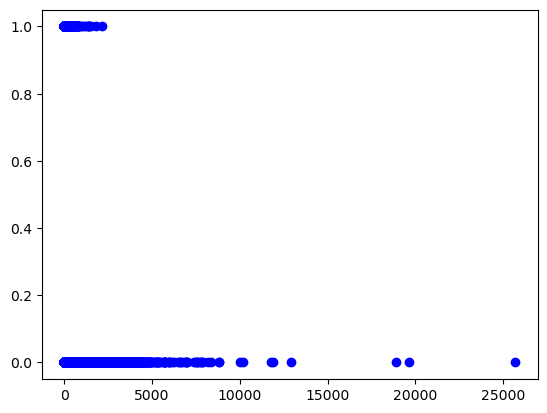

In [287]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

# Show the plot
plt.show()

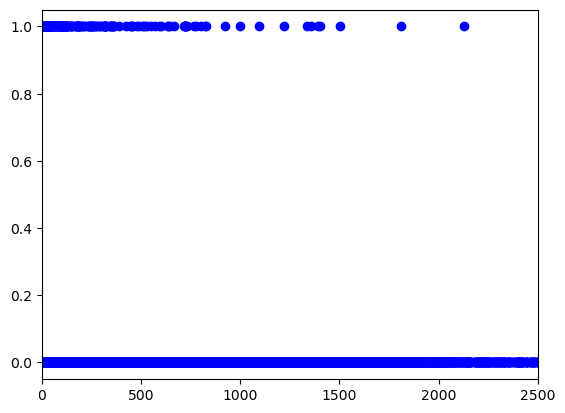

In [288]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

plt.xlim(0,2500)

# Show the plot
plt.show()

Fruad transanction is below the amount of 2500

<Axes: >

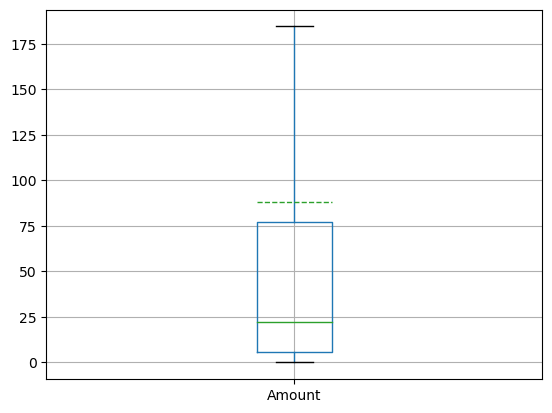

In [289]:
creditcard_df[['Amount']].boxplot(showfliers=False, meanline=True, showmeans=True)


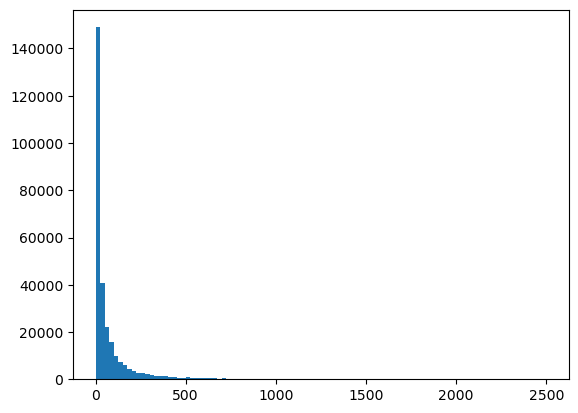

In [290]:
plt.hist(creditcard_df['Amount'], bins= 100, range = (0, 2500))
plt.show()

<Axes: >

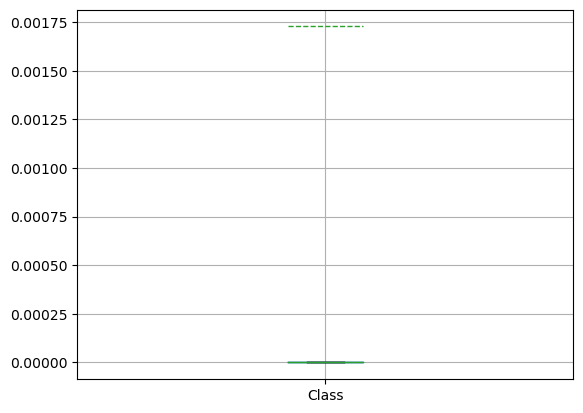

In [291]:
creditcard_df[['Class']].boxplot(showfliers=False, meanline=True, showmeans=True)

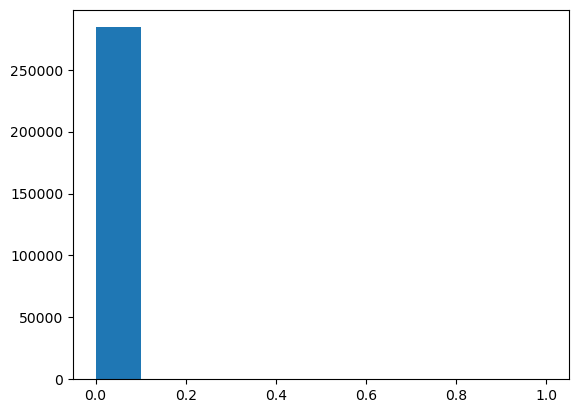

In [292]:
plt.hist(creditcard_df['Class'])
plt.show()

In [293]:
creditcard_df['Class'].sum(axis =0)

492

Hihgly imbalanced data 

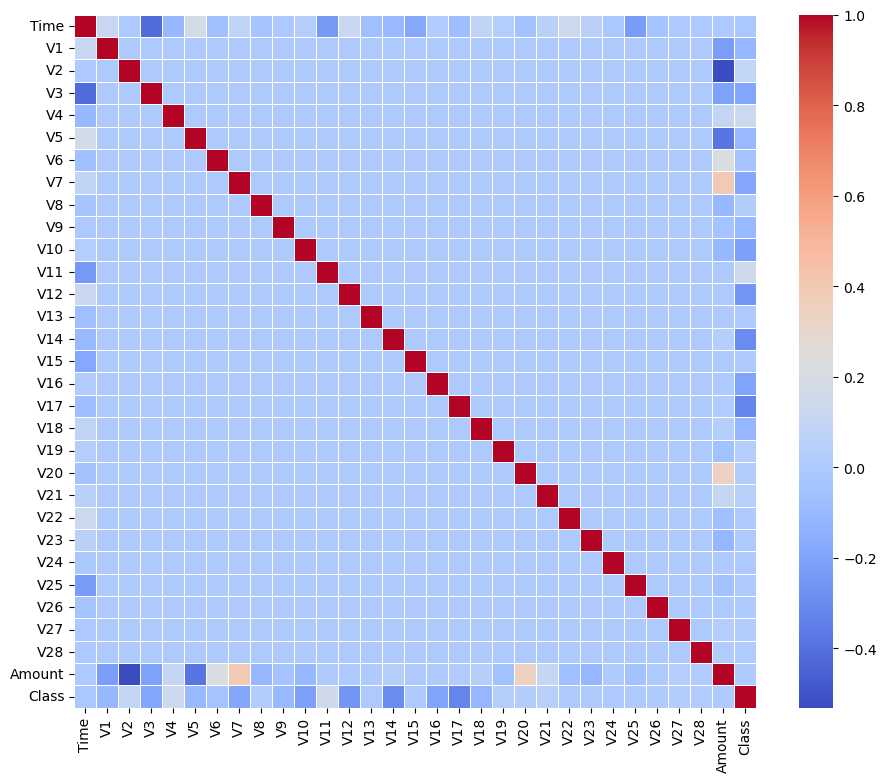

In [294]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr = creditcard_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

most of the columns are uncorrelated so we will use all of them for Supervised Machine Learning and for the purpose of feature Selection we are not merging the same columns

***Group by anaylsis***

*class*

We have grouped the data set into class and other variables as V1 , V2 ....., Amount

In [295]:
grouped_class_df = creditcard_df.groupby('Class')

In [296]:
grouped_class_df.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1                                          \
            75%       max     count      mean       std       min       25%   
Class                                                                         
0      139333.0  172792.0  284315.0  0.008258  1.929814 -56.40751 -0.917544   
1      128483.0  170348.0     492.0 -4.771948  6.783687 -30.55238 -6.036063   

                                           V2                                 \
            50%       75%       max     count      mean       std        min   
Class                                                                          
0      0.020023  1.316218  2.454930  284315.0 -0.006271  1.636146 -72.715728   
1     -2.342497 -0.419200  2.132386     492.0  3.623778  4.291216  -8.402154   

                                                      V3                      \
            25%       50%       75%        max     count      mean       std   
Class                                                                          
0     -0.599473  0.064070  0.800446  18.902453  284315.0  0.012171  1.459429   
1      1.188226  2.717869  4.971257  22.057729     492.0 -7.033281  7.110937   

                                                                V4            \
             min       25%       50%       75%       max     count      mean   
Class                                                                          
0     -48.325589 -0.884541  0.182158  1.028372  9.382558  284315.0 -0.007860   
1     -31.103685 -8.643489 -5.075257 -2.276185  2.250210     492.0  4.542029   

                                                                          V5  \
            std       min       25%       50%       75%        max     count   
Class                                                                          
0      1.399333 -5.683171 -0.850077 -0.022405  0.737624  16.875344  284315.0   
1      2.873318 -1.313275  2.373050  4.177147  6.348729  12.114672     492.0   

                                                                     \
           mean       std         min       25%       50%       75%   
Class                                                                 
0      0.005453  1.356952 -113.743307 -0.689398 -0.053457  0.612181   
1     -3.151225  5.372468  -22.105532 -4.792835 -1.522962  0.214562   

                        V6                                                     \
             max     count      mean       std        min       25%       50%   
Class                                                                           
0      34.801666  284315.0  0.002419  1.329913 -26.160506 -0.766847 -0.273123   
1      11.095089     492.0 -1.397737  1.858124  -6.406267 -2.501511 -1.424616   

                                  V7                                           \
            75%        max     count      mean       std        min       25%   
Class                                                                           
0      0.399619  73.301626  284315.0  0.009637  1.178812 -31.764946 -0.551442   
1     -0.413216   6.474115     492.0 -5.568731  7.206773 -43.557242 -7.965295   

                                             V8                      \
            50%       75%         max     count      mean       std   
Class                                                                 
0      0.041138  0.571019  120.589494  284315.0 -0.000987  1.161283   
1     -3.034402 -0.945954    5.802537     492.0  0.570636  6.797831   

                                                                 V9            \
             min       25%       50%       75

In [297]:
grouped_class_df.size()

Class
0    284315
1       492
dtype: int64

In [298]:
grouped_class1_df = grouped_class_df.get_group(1)

In [299]:
grouped_class1_df.sample(3)

Time        V1        V2        V3        V4        V5        V6  \
6331    7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
96789  65936.0 -3.593476  0.781442 -1.822448  0.605761 -1.194656 -0.517195   
68633  53076.0  1.296231  0.417447  0.193963  0.901644  0.130531 -0.371634   

             V7        V8        V9       V10       V11       V12       V13  \
6331  -1.631735  0.154612 -2.795892 -6.187891  5.664395 -9.854485 -0.306167   
96789 -1.722523  0.128890  0.014963 -2.856117  1.618262 -3.581375  0.623707   
68633  0.158126 -0.202669 -0.079512 -0.045088 -0.876738  0.687488  1.574718   

             V14       V15       V16       V17       V18       V19       V20  \
6331  -10.691196 -0.638498 -2.041974 -1.129056  0.116453 -1.934666  0.488378   
96789  -6.160457  0.494733 -2.543105 -5.301273 -2.192713 -0.094724 -0.478219   
68633  -0.007791  0.948316  0.377154 -0.868183 -0.067135 -0.064493 -0.029559   

            V21       V22       V23       V24       V25       V26       V27  \
6331   0.364514 -0.608057 -0.539528  0.128940  1.488481  0.507963  0.735822   
96789  0.351792  0.391249 -0.252875 -0.498042  0.010172  0.909929 -1.478767   
68633 -0.112114 -0.220002 -0.121022 -0.440454  0.671540 -0.413518  0.032838   

            V28  Amount  Class  
6331   0.513574    1.00      1  
96789  0.722673  101.50      1  
68633  0.020600    1.18      1

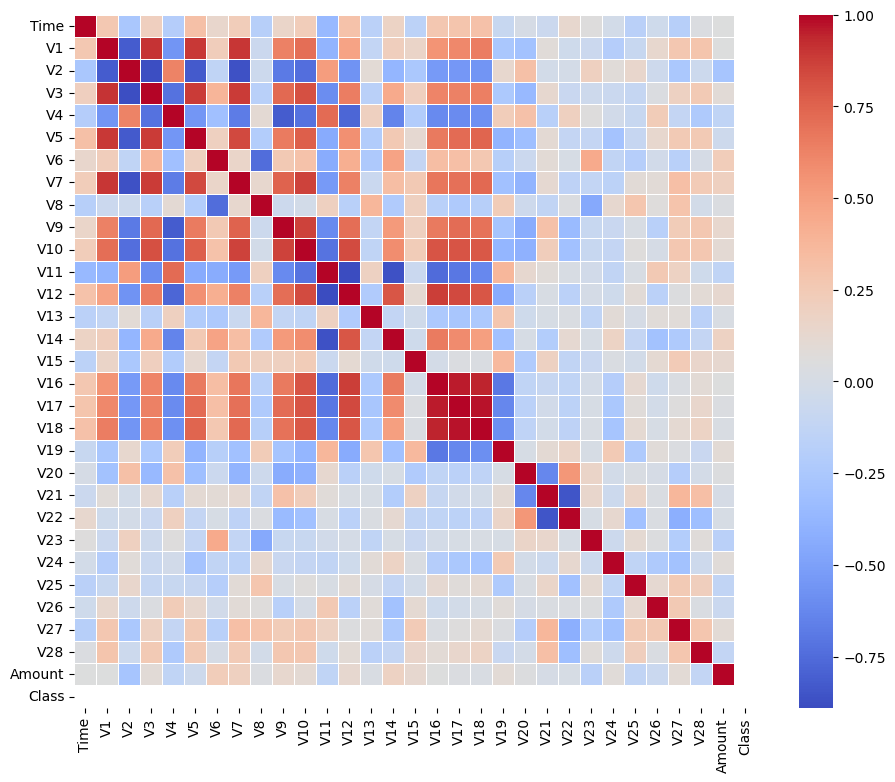

In [300]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class1_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

There are certain varibles for eg. V1 and V3 are highly correlated for fraudulent transaction

In [301]:
grouped_class0_df = grouped_class_df.get_group(0)

In [302]:
grouped_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
91830    63645.0  0.517718 -0.801632  0.175666  1.573519 -0.482142  0.133294   
163783  116205.0  2.075208 -2.245383  0.834420 -0.930086 -2.796182  0.388844   
196500  131540.0  2.321966 -1.480598 -2.762090 -2.690186  1.422666  3.140806   
225675  144345.0  0.331354  0.329668 -0.447728 -0.689464  0.762167 -0.805169   
213796  139396.0 -4.469377  4.027662 -3.010045 -3.798316  4.002624  2.694479   

              V7        V8        V9       V10       V11       V12       V13  \
91830   0.385002  0.030085 -0.039370 -0.102214  1.372973  1.372272 -0.059724   
163783 -2.471214  0.315455  0.682593  1.174926 -2.027197 -0.599174 -0.245790   
196500 -1.369206  0.667800 -1.742474  1.704802 -0.085522 -0.896399  0.344405   
225675  0.700647 -0.020934  0.093870 -0.186279  0.058682 -0.069885 -1.670949   
213796  2.954663 -1.365944  5.492659  9.047062  1.345465 -0.905563 -0.773533   

             V14       V15       V16       V17       V18       V19       V20  \
91830   0.316559 -0.786881 -0.552965  0.088681 -0.504460 -0.253761  0.444085   
163783 -1.754346 -1.886736 -0.782620  1.024825  0.302545  0.115938 -0.420935   
196500  0.071211  0.591771 -0.696739  0.317754 -0.082998 -0.462881 -0.359348   
225675  0.742899 -1.157319  0.194750 -0.745939  0.022080  0.170902 -0.317270   
213796 -2.997161  0.940880 -2.164939 -1.826497 -1.173875 -0.876757  3.637443   

             V21       V22       V23       V24       V25       V26       V27  \
91830   0.149951 -0.055092 -0.320521  0.251645  0.498107 -0.375310 -0.020353   
163783 -0.054707  0.682836  0.176291  0.067643 -0.390158  0.018670  0.108841   
196500  0.069176  0.574281  0.107342  0.719969  0.130962  0.090974  0.006125   
225675 -0.010978 -0.045354  0.425892 -0.443545 -2.251371 -0.157506  0.295140   
213796 -1.111538  0.698342 -0.403805  0.663638  0.511997 -0.239452 -0.294598   

             V28  Amount  Class  
91830   0.061246  313.63      0  
163783 -0.022022   52.95      0  
196500 -0.067240   15.00      0  
225675  0.338006    4.49      0  
213796 -2.099527    0.92      0

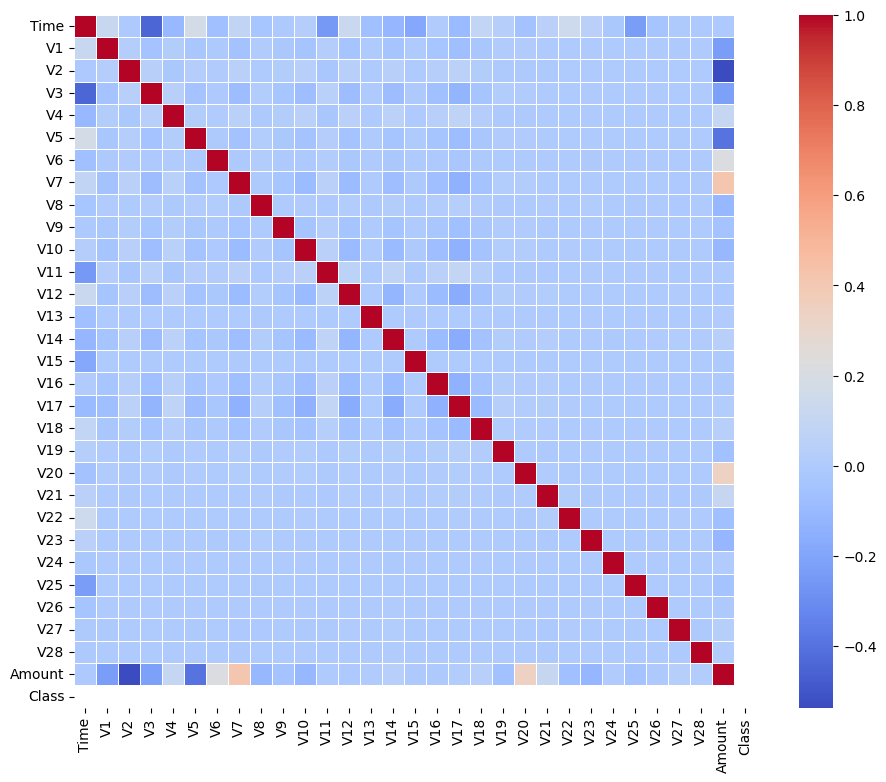

In [303]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

For the observation purpose we can observe that in case of both fraudulent and non fraudulent transactions the variables from V1 to V17 are correlated 

*Amount*

Again we have grouped the dataset into amount and other variables like V1, V2 .... and amount which is additional work in our analysis

After grouping pair plotting has been performed to have better visualisation of the data

In [304]:
creditcard_df['Amount_Group'] = creditcard_df['Amount'].apply(categorize_amount)

In [305]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
193157  130015.0  1.993377 -0.617763 -0.513399  0.459703 -0.498671  0.097609   
257295  158093.0  0.144284  1.097014 -1.279848 -0.248399  0.506294 -1.260297   
21096    31461.0 -0.678124 -0.186876  2.989155  0.424337 -0.458720  1.996461   
108427   70892.0 -2.039100  0.595148  0.497757 -0.877703 -0.199651 -0.320160   
66594    52125.0 -0.698174  1.509921  2.015418  2.949317  0.121206  0.161640   

              V7        V8        V9       V10       V11       V12       V13  \
193157 -0.647758 -0.025561  1.569603 -0.171770 -1.902306  0.828285  1.078428   
257295  0.969009  0.071672 -0.486968 -1.197183 -0.302282  0.677960  0.931052   
21096  -0.369584  0.403119  0.982392 -0.590724 -0.774419  0.978159  0.928533   
108427 -0.121720  0.531590  0.596891 -0.649324 -1.301996  0.176807 -0.435171   
66594   0.528537 -0.130366 -1.173502  0.799327 -0.675676  0.365208  1.124712   

             V14       V15       V16       V17       V18       V19       V20  \
193157 -0.845011 -0.990602 -0.126923 -0.336474 -0.091792  0.375900 -0.088767   
257295 -0.820926 -0.612156  0.177681  0.725029 -0.354933 -0.512536 -0.129691   
21096  -1.603538 -1.828939 -0.244473 -0.259225  0.945101  1.967246  0.431513   
108427 -0.044187 -0.634780 -0.240480  0.269353 -0.893118 -0.257351 -0.642481   
66594  -0.384400 -0.068766 -0.662019  0.350580 -0.459376  1.239378  0.129280   

             V21       V22       V23       V24       V25       V26       V27  \
193157  0.177365  0.960533 -0.093401 -0.576244  0.099885  0.926727 -0.018317   
257295 -0.019976 -0.147434  0.349884  1.081532 -0.746223  0.135989 -0.133632   
21096   0.079128  0.769421 -0.440813 -0.899838  0.423146  0.883422 -0.072178   
108427  0.034102  0.249084  0.103770 -0.191568 -0.370529  0.865033 -0.982704   
66594  -0.070203 -0.130989 -0.176219  0.431298 -0.109731  0.095582 -0.273934   

             V28  Amount  Class Amount_Group  
193157 -0.058525   28.35      0       0-2500  
257295 -0.018951   52.90      0       0-2500  
21096  -0.155181   78.60      0       0-2500  
108427 -0.132469   10.00      0       0-2500  
66594   0.134409    1.52      0       0-2500

In [306]:
grouped_amount_df = creditcard_df.groupby('Amount_Group')

In [307]:
grouped_amount_df.size()

Amount_Group
0-2500        284367
2500-above       440
dtype: int64

In [308]:
grouped_amountlow_df = grouped_amount_df.get_group('0-2500') 

In [309]:
col = grouped_amountlow_df.columns

In [310]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Group'],
      dtype='object')

In [311]:
col1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [312]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

In [313]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

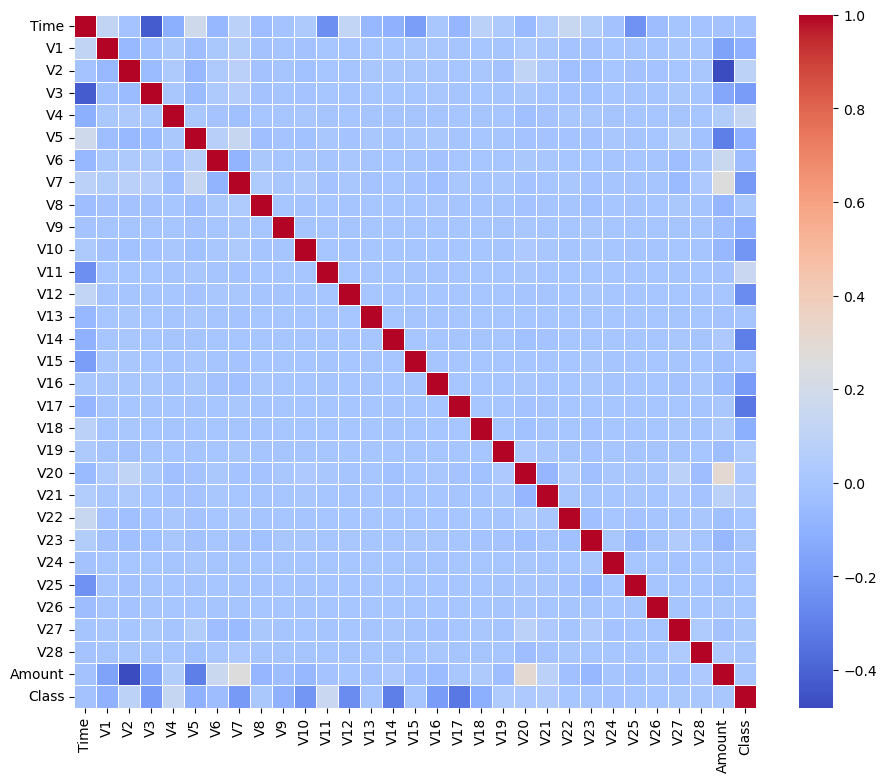

In [314]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_amountlow_df[col1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


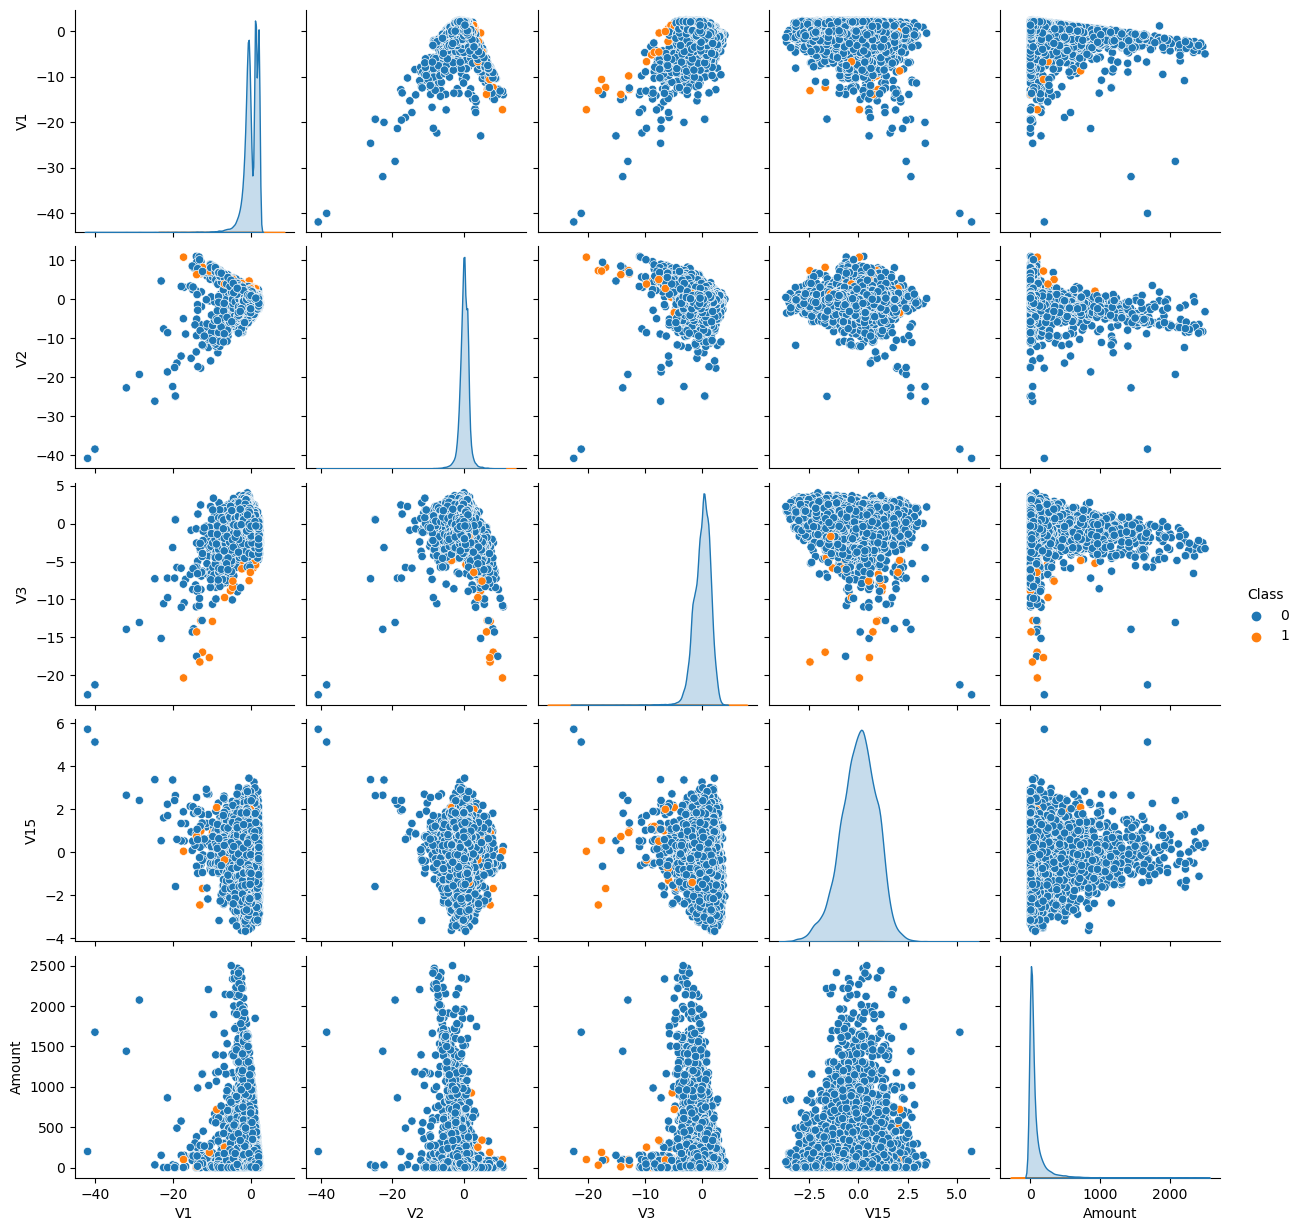

In [315]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.1), hue = 'Class')
plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


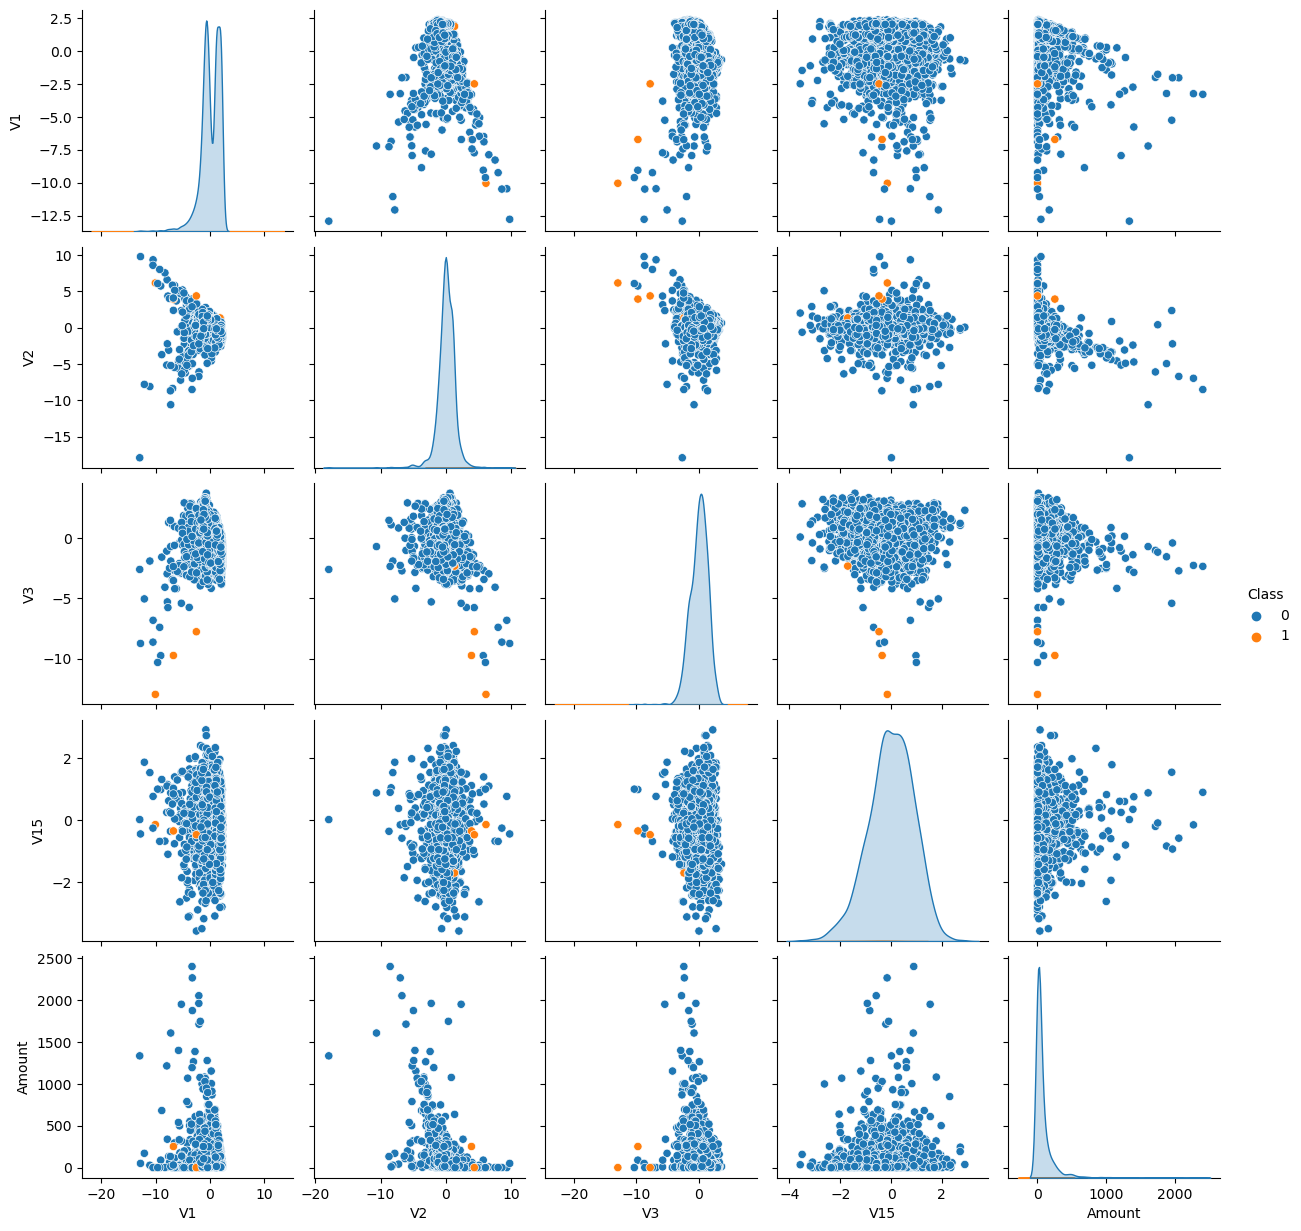

In [316]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.01), hue = 'Class')
plt.show()

In [317]:
col3 = ['V10', 'V12', 'V20', 'V27','Amount',
       'Class']


/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


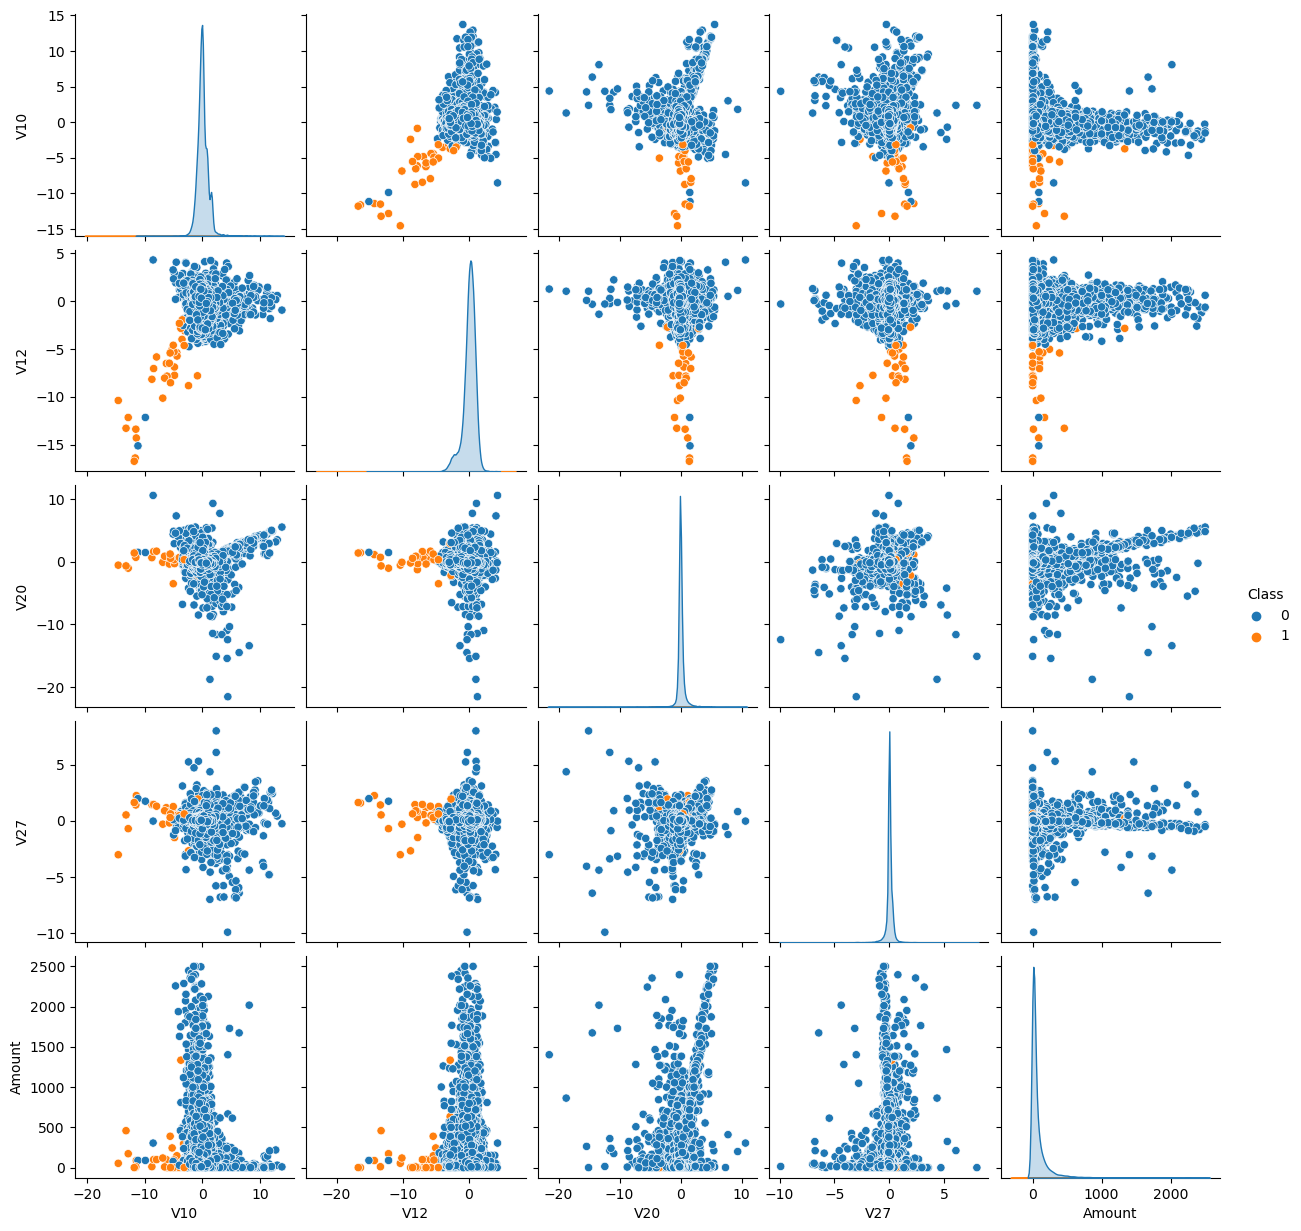

In [318]:
sns.pairplot(grouped_amountlow_df[col3].sample(frac = 0.1), hue = 'Class')
plt.show()

In [319]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']


In [320]:
#sns.pairplot(grouped_amountlow_df[col4].sample(frac = 0.1), hue = 'Class')
#plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


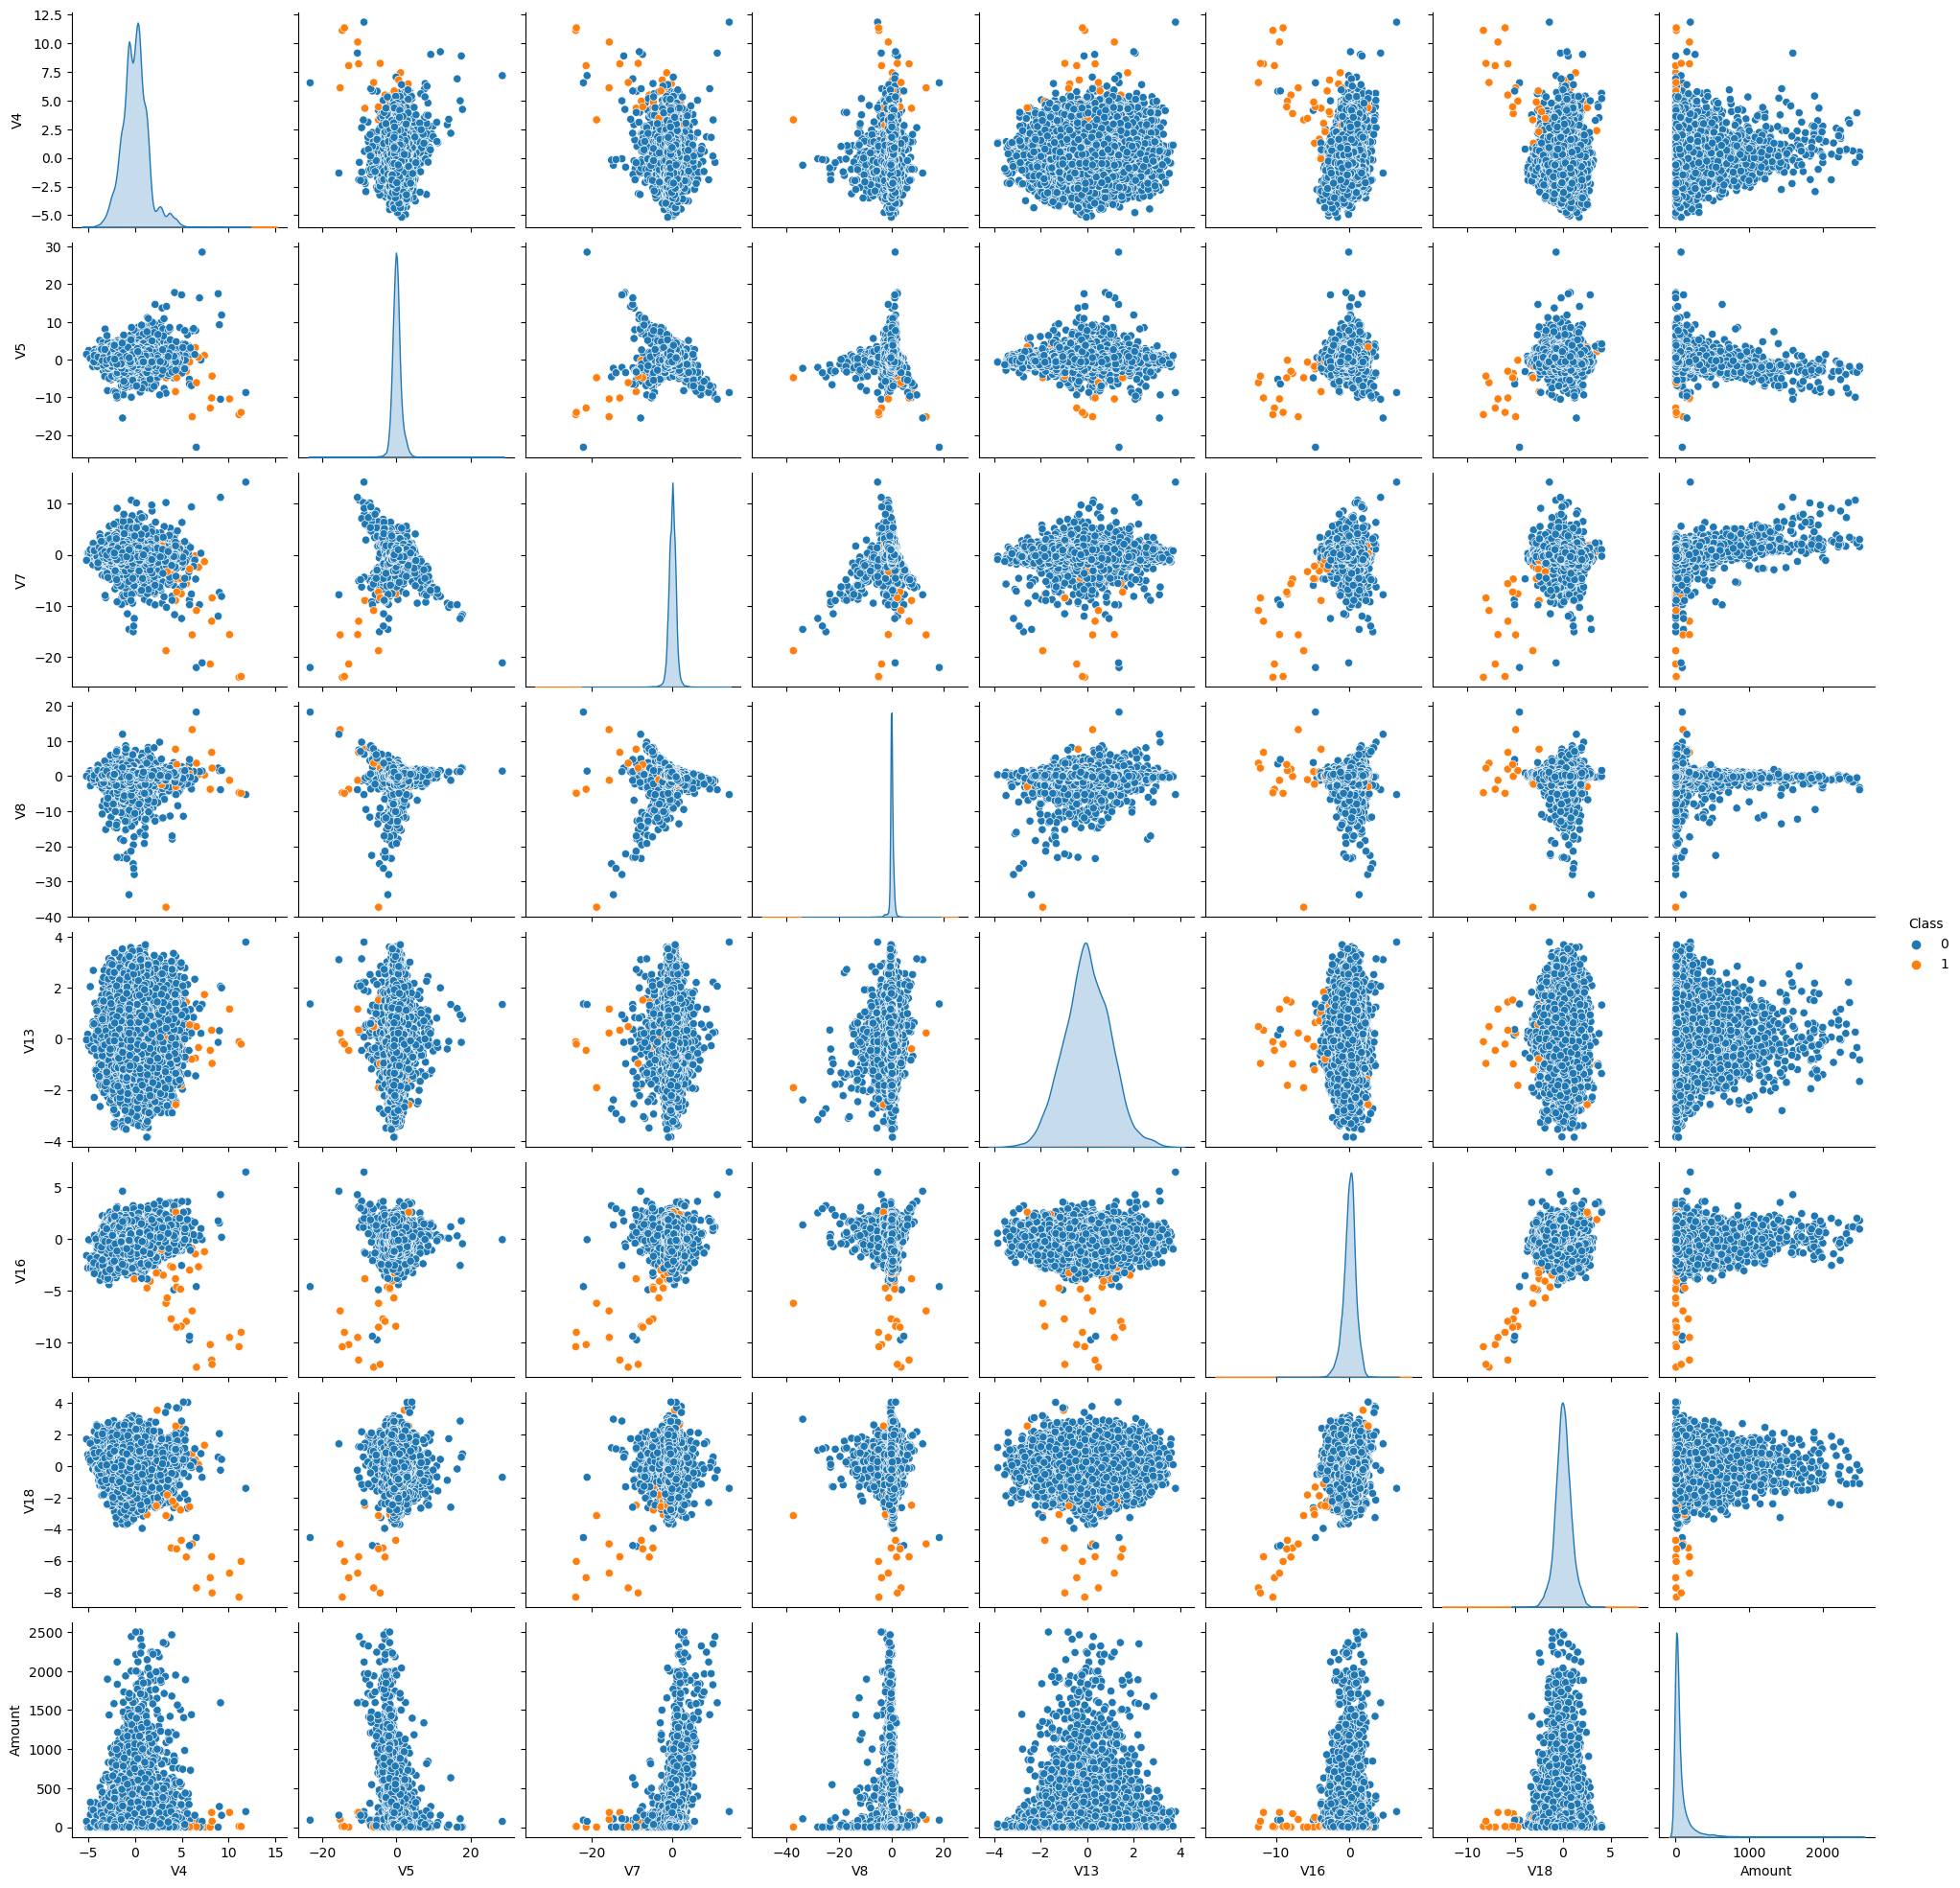

In [321]:
sns.pairplot(grouped_amountlow_df[col5].sample(frac = 0.1), hue = 'Class')
plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


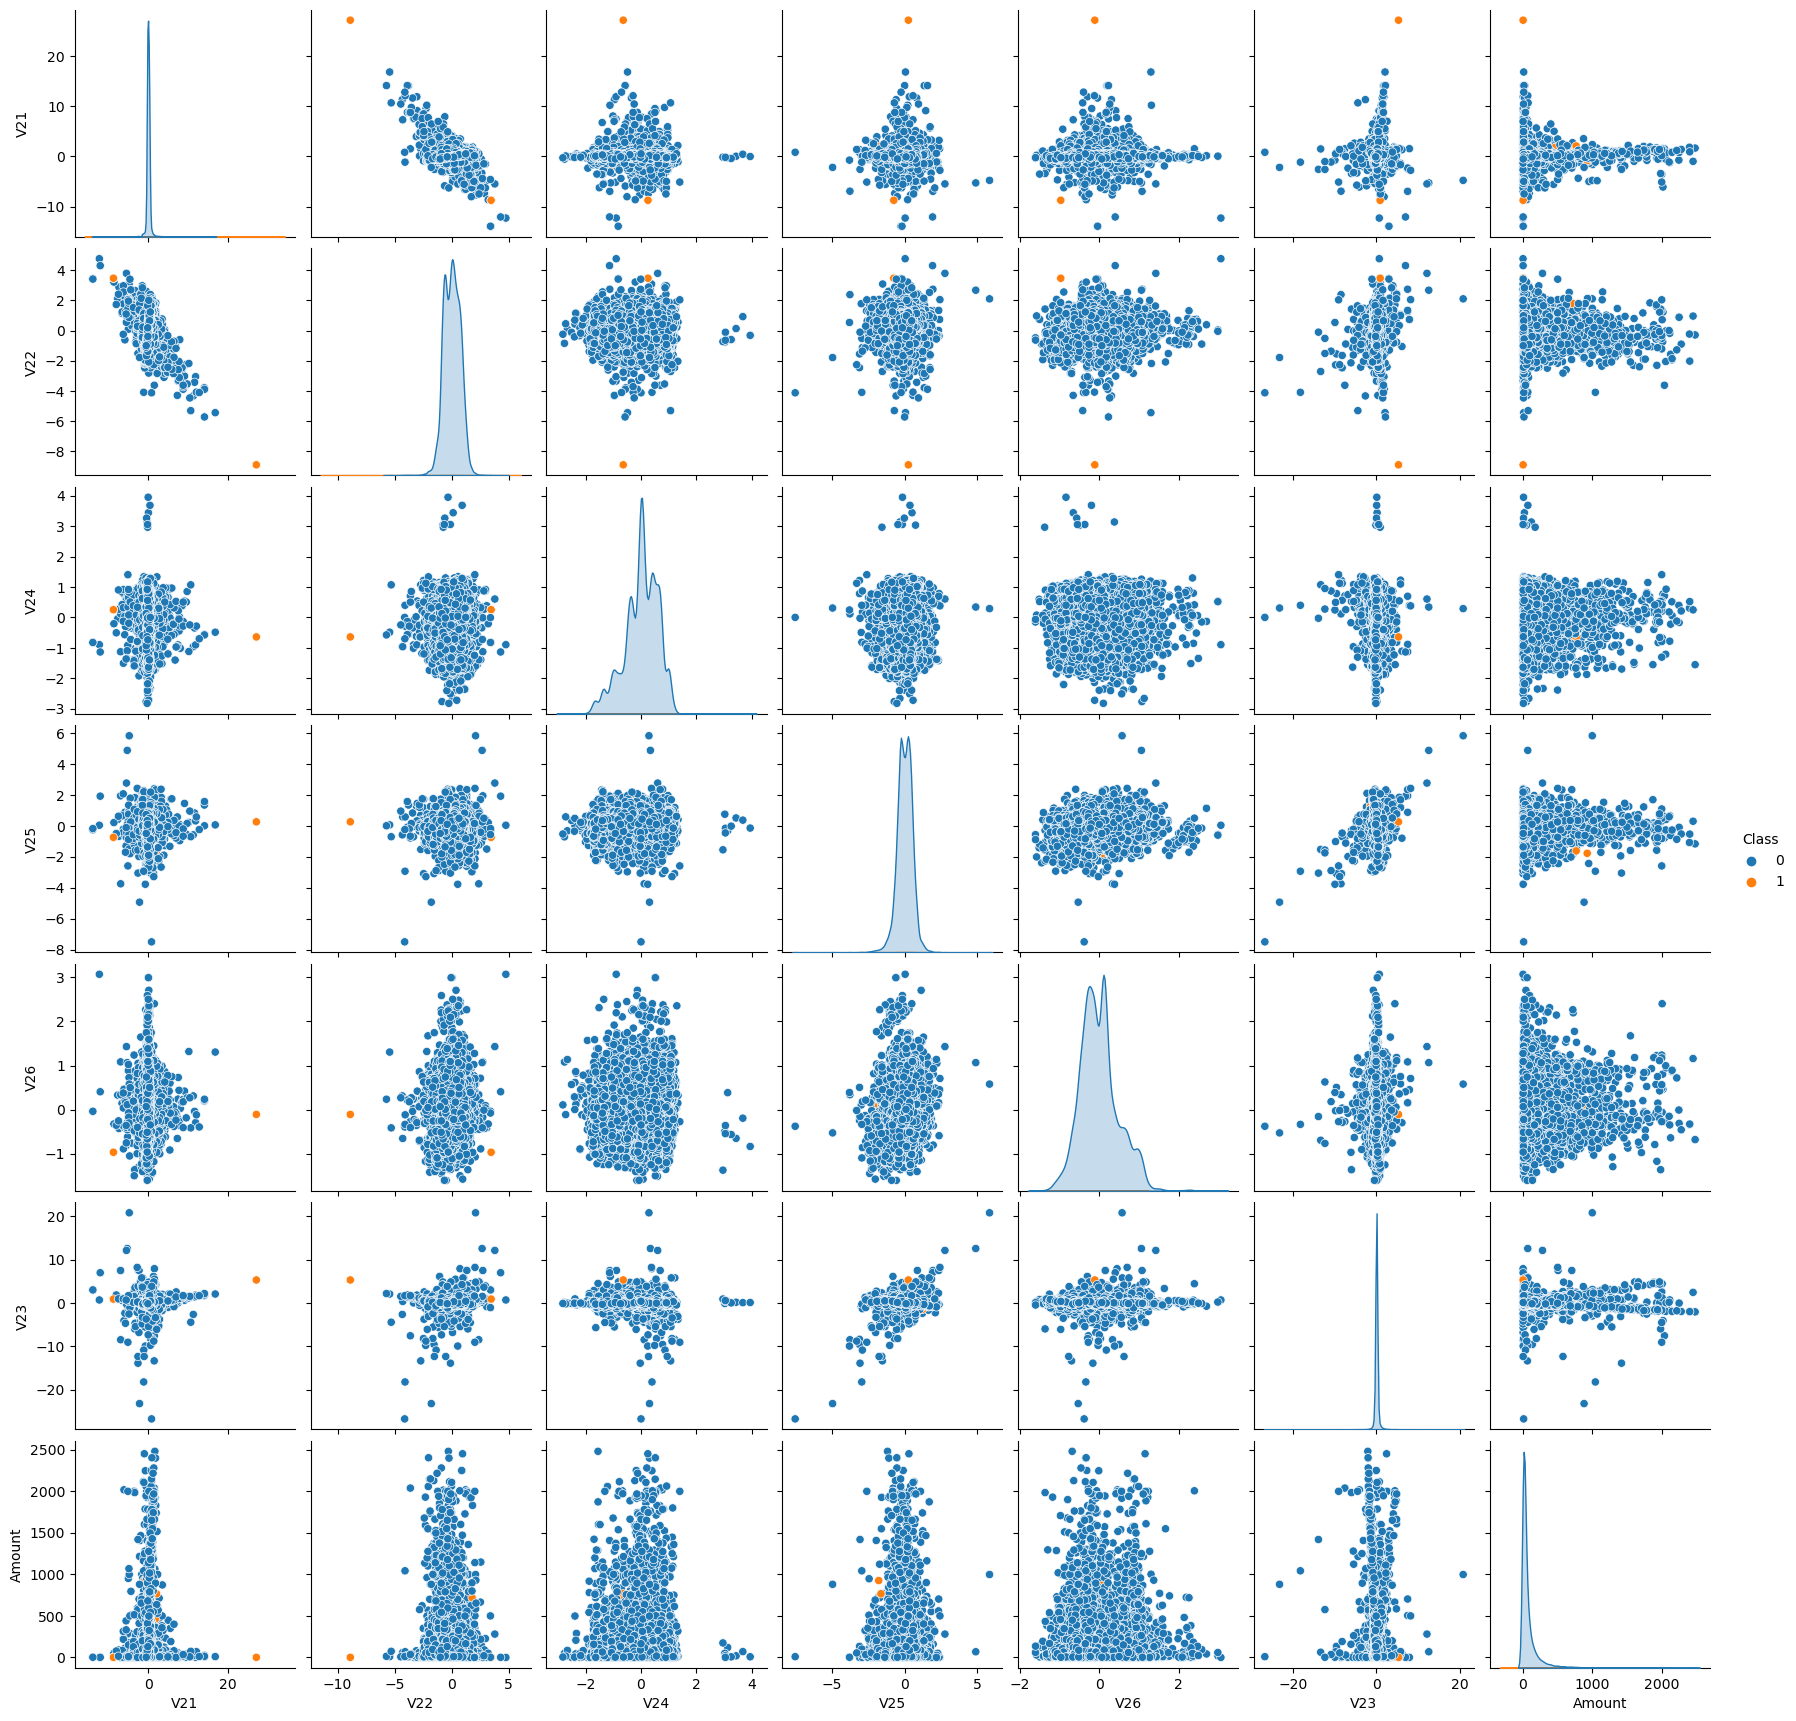

In [322]:
sns.pairplot(grouped_amountlow_df[col6].sample(frac = 0.1), hue = 'Class')
plt.show()

 #after pairs plotting we can identify there are some outliers which are fraud

In [323]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

*two group*

In [324]:
grouped_amount_class_df = creditcard_df.groupby(['Amount_Group', 'Class'])

In [325]:
grouped_amount_class_df.size()

Amount_Group  Class
0-2500        0        283875
              1           492
2500-above    0           440
dtype: int64

In [326]:
grouped_amount_class_df.sample(3)

Time         V1        V2         V3        V4         V5  \
128425   78704.0   1.036196 -1.066521  -0.122859 -0.289417  -1.117528   
220635  142251.0  -0.246074  1.108652   0.206821  0.006134   0.814706   
230243  146249.0  -1.320396  1.015546  -0.528807 -1.434584   1.786590   
254344  156685.0  -0.129778  0.141547  -0.894702 -0.457662   0.810608   
119714   75556.0  -0.734303  0.435519  -0.530866 -0.471120   0.643214   
150667   93860.0 -10.850282  6.727466 -16.760583  8.425832 -10.252697   
173935  121702.0  -5.168050 -7.798440  -3.291993  1.390596  -7.073850   
50509    44521.0  -6.655422 -9.959244  -2.636465  1.874222   1.353413   
67724    52672.0  -3.473410 -3.340090  -6.668077  0.757137 -25.791132   

               V6         V7        V8        V9        V10       V11  \
128425  -1.001680   0.011029 -0.329389 -0.778297   0.542684 -0.784192   
220635  -0.899466   1.021862 -0.224127 -0.289239  -1.389082 -0.543043   
230243   3.964211  -0.934846  1.912055 -0.109873  -1.106357 -0.482743   
254344  -0.504723   1.373588 -0.209476  0.208494  -1.613618 -0.800150   
119714   0.713832  -1.234572 -2.551412 -2.057724   0.166831  0.567552   
150667  -4.192171 -14.077086  7.168288 -3.683242 -15.239962  8.030708   
173935   6.463125  10.787739 -0.569182 -0.562884  -3.357999  0.114528   
50509   -0.187685  -1.066356 -2.861828  0.200296  -2.069517 -0.047143   
67724   16.246197  25.235195 -4.371569 -0.772552  -4.395664  1.922070   

              V12       V13        V14       V15        V16        V17  \
128425  -0.176449 -0.097719   0.119478  0.011675  -1.759031   0.336137   
220635   0.187275  0.676941  -1.928548 -0.609285  -0.219922   1.355862   
230243   0.383452 -0.060217   0.670273  0.932457   0.109819  -0.170225   
254344   0.501435  1.118014  -1.816384 -0.681283   0.105946   0.716591   
119714  -0.858060 -0.448068  -0.264936  0.888863   0.838121   1.425060   
150667 -16.060306  0.270530 -14.952981 -0.241095 -11.866731 -15.486990   
173935  -0.333153 -1.054236   0.262383 -1.200257  -1.149010   0.470617   
50509    1.107259 -1.068187   1.785186  0.458914  -0.475067   0.976803   
67724   -1.473733 -0.291160  -1.252215  0.118250   2.241491  -0.861357   

             V18       V19       V20       V21       V22       V23       V24  \
128425  0.668509 -0.522502 -0.129225 -0.336737 -0.810584 -0.169680  0.447220   
220635  0.199406  0.211434  0.034357  0.075769  0.516795 -0.345191 -0.047938   
230243 -0.028059  0.245459 -0.251724 -0.008569 -0.411999  0.086141  0.662307   
254344  0.205285 -0.051322  0.399447 -0.032643 -0.246526  0.484108  0.359637   
119714 -0.169664  2.502027  0.864536 -1.004877  1.150354 -0.152555 -1.386745   
150667 -5.748652  4.130031 -0.646818  2.541637  0.135535 -1.023967  0.406265   
173935 -0.077410 -0.166566  6.275172  1.505787 -0.331445  6.778624 -2.015276   
50509  -2.375418 -4.539840  5.903576  0.679553 -1.704862 -8.994507 -0.463299   
67724  -0.099013  0.022380 -2.637512 -1.619268  0.284792  1.345480  0.653536   

             V25       V26       V27       V28   Amount  Class Amount_Group  
128425  0.353925  1.072057 -0.106773  0.030741   198.00      0       0-2500  
220635 -0.068213  0.679934  0.128015  0.182536     6.99      0       0-2500  
230243 -0.262351 -0.529261 -0.335885  0.005557     4.99      0       0-2500  
254344 -0.435972 -0.248480  0.021527  0.109192   187.11      1       0-2500  
119714  0.004716  0.219146 -0.058257  0.158048    29.95      1       0-2500  
150667  0.106593 -0.026232 -1.464630 -0.411682    78.00      1       0-2500  
173935  0.818902 -0.466469 -0.978551  0.122818  2960.47      0   2500-above  
50509  -2.343963 -0.094749 -0.151869  0.970655  3000.00      0   2500-above  
67724  -0.024119  1.009788  3.198900 -2.156408  5657.54      0   2500-above

In [327]:
grouped_amountlow_class1_df = grouped_amount_class_df.get_group(('0-2500', 1))

In [328]:
grouped_amountlow_class1_df.describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

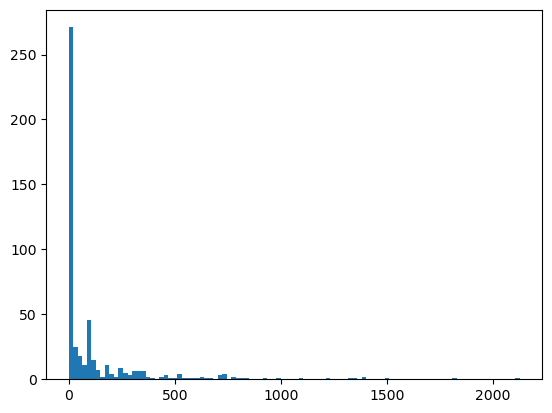

In [329]:
plt.hist(grouped_amountlow_class1_df['Amount'], bins=100)
plt.show()

We can observe that fruad transaction via credit cards occurs at very low range of amount around 100 dollars

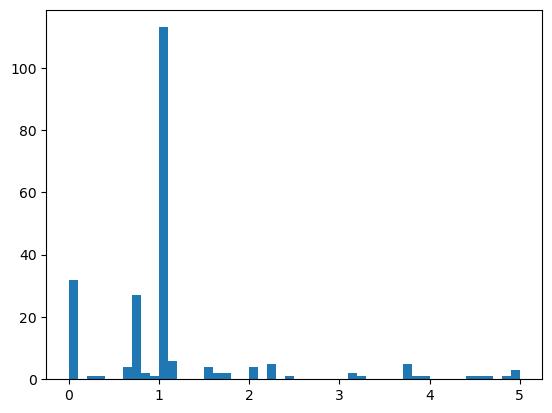

In [330]:
plt.hist(grouped_amountlow_class1_df['Amount'], range=(0,5), bins=50)
plt.show()

For fruadlent transaction mode of amount =1 dollar

In [331]:
grouped_amountlow_class0_df = grouped_amount_class_df.get_group(('0-2500', 0))

In [332]:
grouped_amountlow_class0_df.describe()

Time             V1             V2             V3  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean    94842.693002       0.019252       0.011278       0.020141   
std     47486.591102       1.896891       1.543058       1.438756   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54237.500000      -0.913512      -0.595753      -0.878702   
50%     84715.000000       0.023871       0.065687       0.184441   
75%    139340.000000       1.316972       0.801707       1.029929   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.012053       0.017056      -0.003995      -0.003225   
std         1.392545       1.279867       1.299465       1.076977   
min        -5.683171     -23.669726     -26.160506     -31.764946   
25%        -0.851194      -0.686058      -0.767394      -0.552336   
50%        -0.024309      -0.052033      -0.274552       0.039884   
75%         0.733815       0.613252       0.395629       0.568357   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.002065       0.005339       0.012705      -0.006953   
std         1.153434       1.088449       1.040267       1.002772   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.207385      -0.639440      -0.530921      -0.763604   
50%         0.022636      -0.049409      -0.090828      -0.035154   
75%         0.326947       0.598685       0.456700       0.735867   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.011214      -0.000310       0.011228      -0.000451   
std         0.945446       0.994830       0.896178       0.914423   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.401400      -0.648514      -0.422857      -0.583170   
50%         0.141938      -0.013859       0.051350       0.047831   
75%         0.619288       0.661984       0.492874       0.648318   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.006018       0.011570       0.003407       0.000122   
std         0.842411       0.749273       0.823714       0.810010   
min       -10.115560     -17.098444      -5.366660      -4.932733   
25%        -0.465782      -0.482640      -0.497319      -0.454861   
50%         0.066979      -0.064971      -0.002997       0.003967   
75%         0.522904       0.399787       0.500424       0.457997   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V21            V22            V23  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.007283      -0.003176       0.001888       0.002227   
std         0.684865       0.707172       0.719780       0.555094   
min       -23.646890     -34.830382      -8.593642     -36.666000   
25%        -0.211797      -0.228572      -0.541013      -0.161164   
50%        -0.062898      -0.030150       0.007580      -0.010958   
75%         0.131507       0.184764       0.528964       0.147489   
max        16.756448      22.614889      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.000027       0.000876       0.000179      -0.000799   
std         0.605311       0.516503       0.481869       0.387242   
min     

In [333]:
grouped_amountlow_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
106404  69954.0  1.303287  1.023966 -3.187599  0.468391  3.353988  2.431416   
137927  82399.0  0.795707 -2.066211 -0.635208 -1.357259 -1.107582 -0.276777   
113042  72905.0 -0.343369  1.092825  1.278107  0.066744 -0.024180 -0.985415   
47415   43204.0 -1.656843 -0.297905  1.326451  1.057750 -1.680887  1.603754   
76798   56746.0 -3.476954 -3.545309  1.501537 -0.748139 -0.637360  0.534110   

              V7        V8        V9       V10       V11       V12       V13  \
106404  0.184510  0.622721 -0.556254 -1.485591  1.021622 -0.735358 -0.334758   
137927 -0.105690 -0.287058 -2.483013  1.407117  0.683271 -0.003954  1.270429   
113042  0.692278 -0.046993 -0.323509 -0.500412 -0.297762 -0.337316 -0.361237   
47415   1.148492  0.705179 -0.178562 -1.171539 -1.630192 -0.830228 -0.923666   
76798  -0.436586  0.994948 -1.024055 -0.868990  0.940348  0.449841 -0.071934   

             V14       V15       V16       V17       V18       V19       V20  \
106404 -3.207687  1.275891  1.369608  2.215750  1.797339 -0.464014  0.078229   
137927  0.001172 -0.305677 -0.104349  0.026848  0.195546  0.519960  0.548948   
113042 -0.333871  0.946940  0.407173  0.033821 -0.077077 -0.086729  0.088563   
47415   0.291467  1.293771  0.118456  0.077315  0.531990  0.377947  0.857570   
76798  -0.293058 -1.353679  0.719946  0.972503 -1.565613 -0.160357  1.546733   

             V21       V22       V23       V24       V25       V26       V27  \
106404 -0.265551 -0.823366 -0.241908  0.674554  1.012236 -0.278656  0.041260   
137927 -0.323539 -1.497378 -0.264975 -0.557468  0.201607 -0.536829 -0.065252   
113042 -0.268206 -0.729425 -0.003556  0.315217 -0.175157  0.073711  0.241619   
47415   0.319323  0.085831  0.785841 -0.856211  0.425200 -0.192437 -0.149239   
76798   0.672302  0.307950  0.853606 -0.305855  0.397846 -0.321752 -0.143003   

             V28  Amount  Class Amount_Group  
106404  0.089912    1.00      0       0-2500  
137927  0.070575  407.91      0       0-2500  
113042  0.097346    6.15      0       0-2500  
47415   0.049047  463.68      0       0-2500  
76798  -0.337247  463.08      0       0-2500

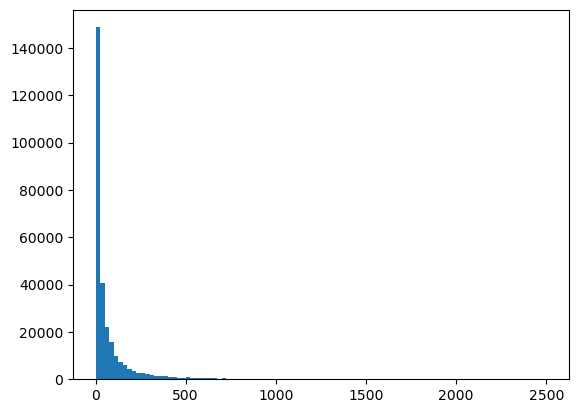

In [334]:
plt.hist(grouped_amountlow_class0_df['Amount'], bins=100)
plt.show()

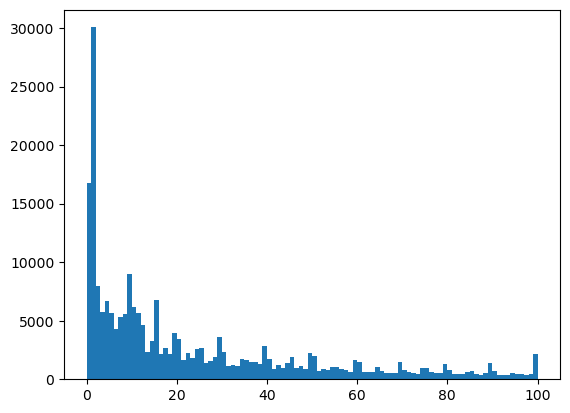

In [335]:
plt.hist(grouped_amountlow_class0_df['Amount'],range =(0,100),  bins=100)
plt.show()

Time
NF


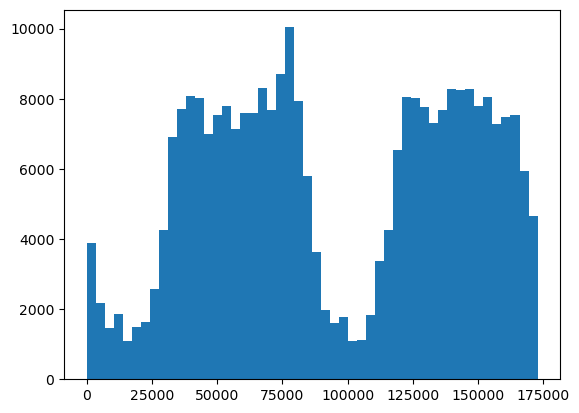

F


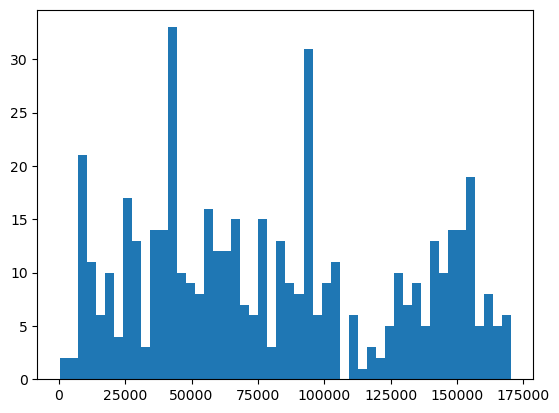

V1
NF


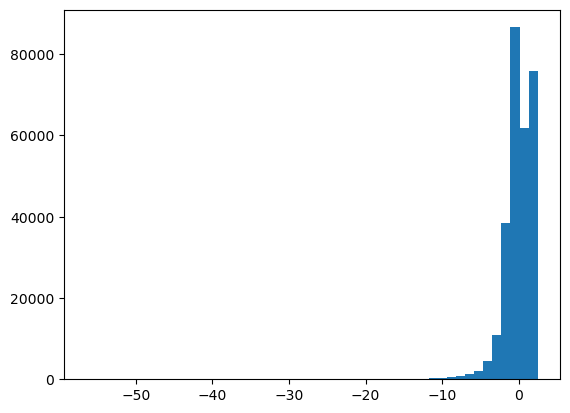

F


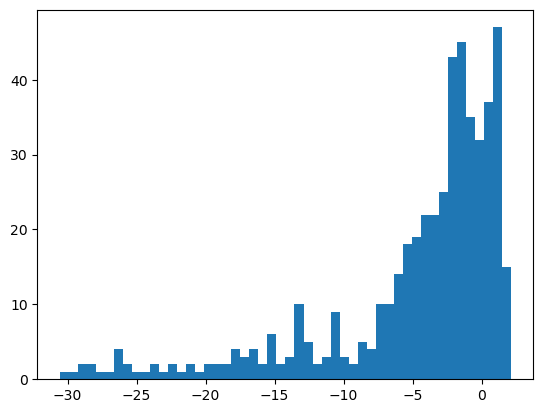

V2
NF


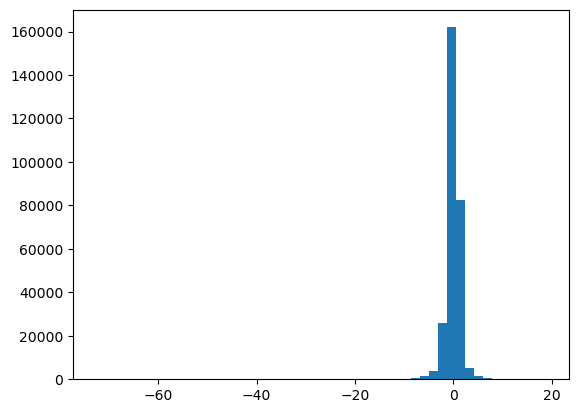

F


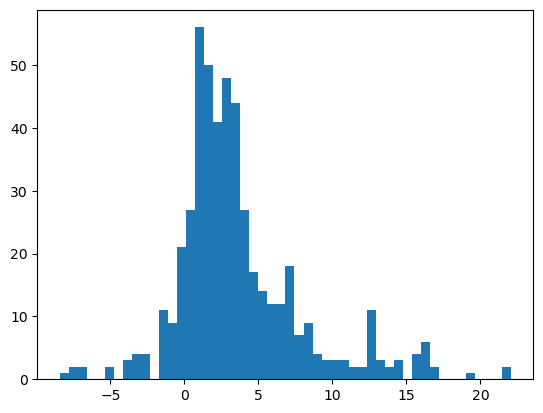

V3
NF


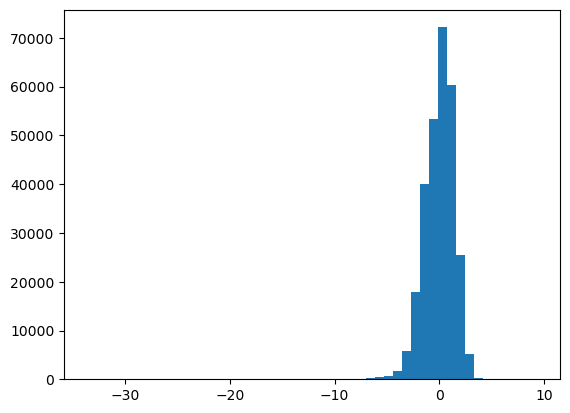

F


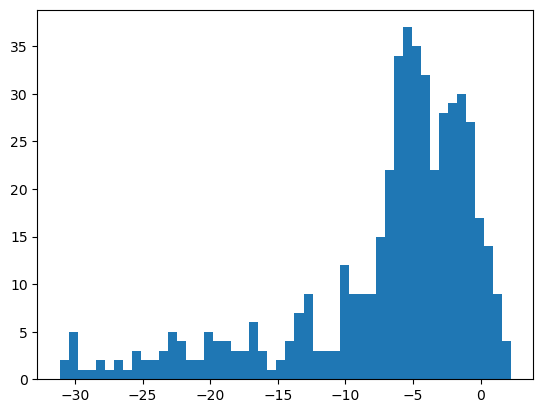

V4
NF


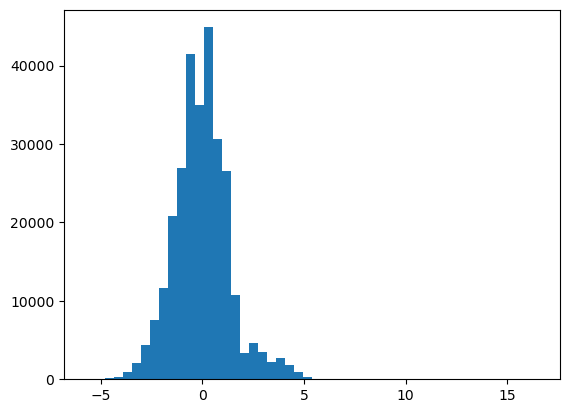

F


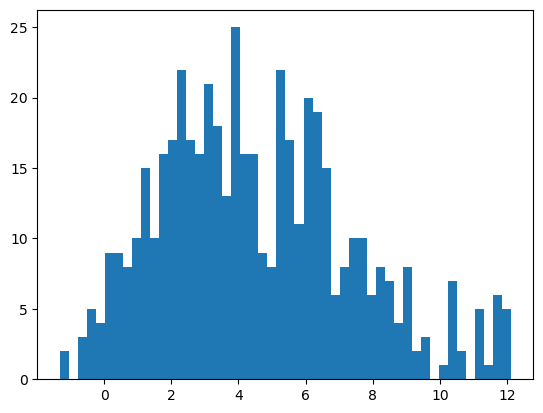

V5
NF


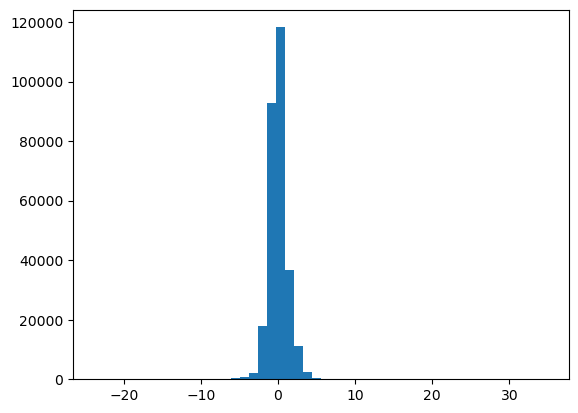

F


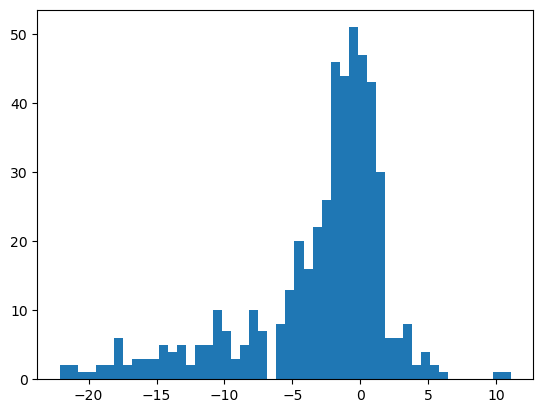

V6
NF


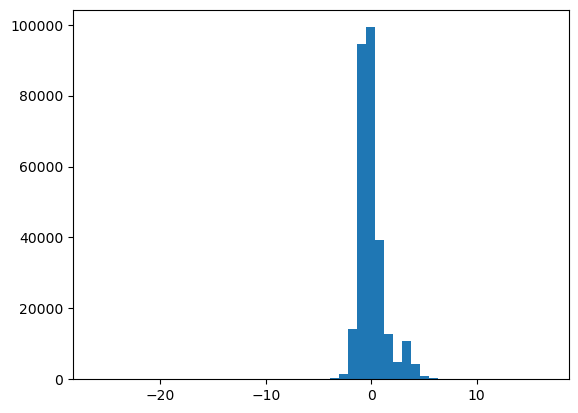

F


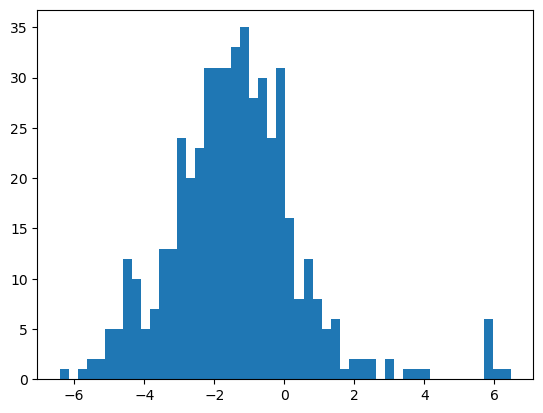

V7
NF


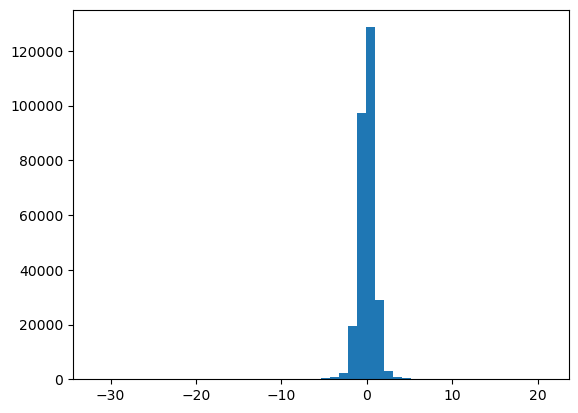

F


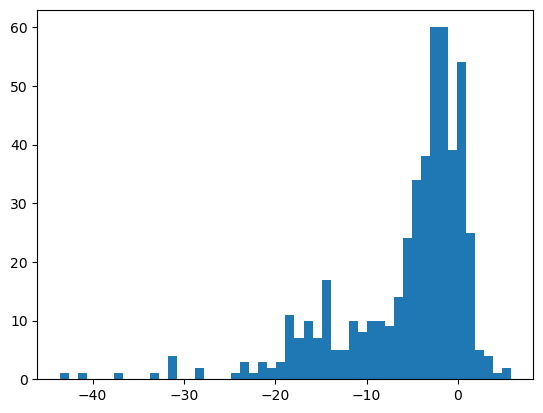

V8
NF


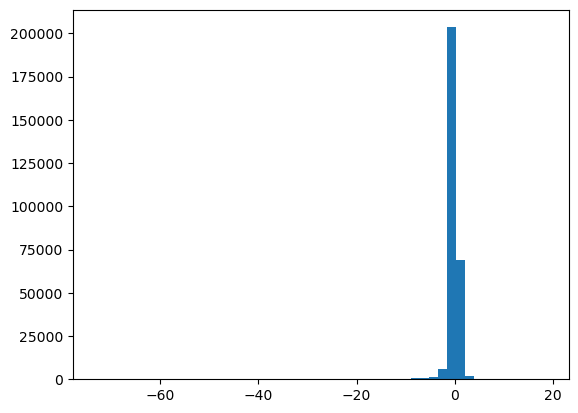

F


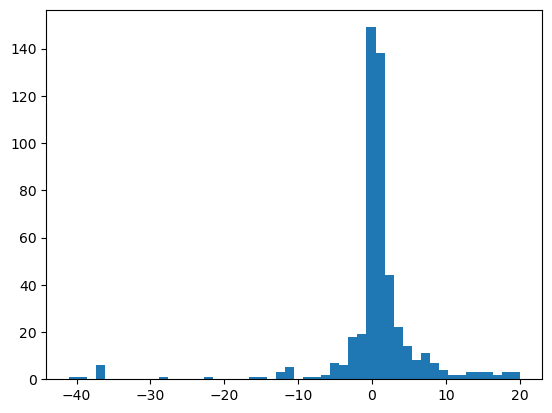

V9
NF


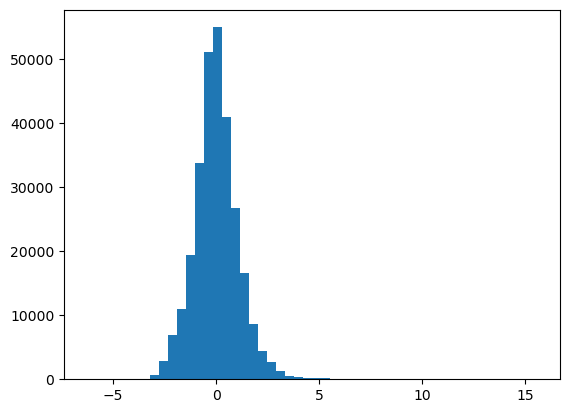

F


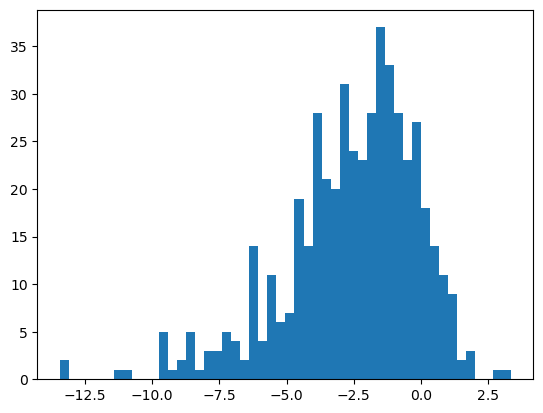

V10
NF


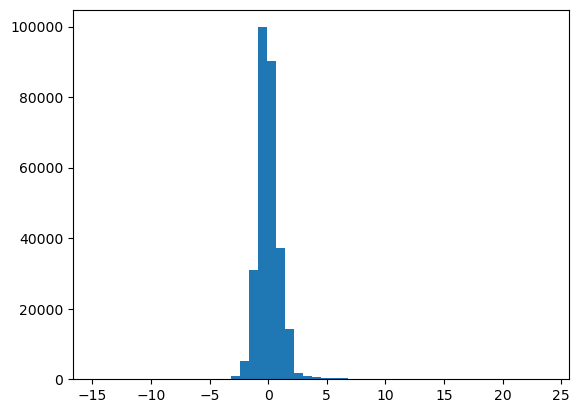

F


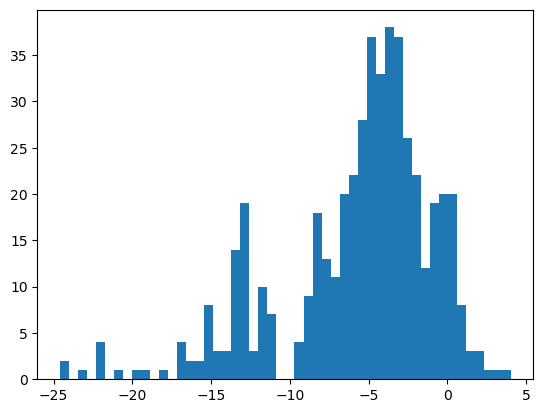

V11
NF


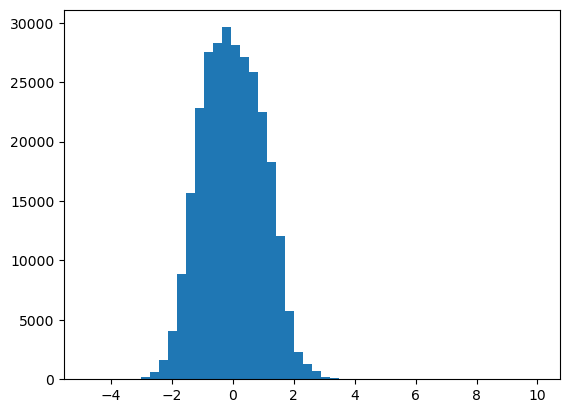

F


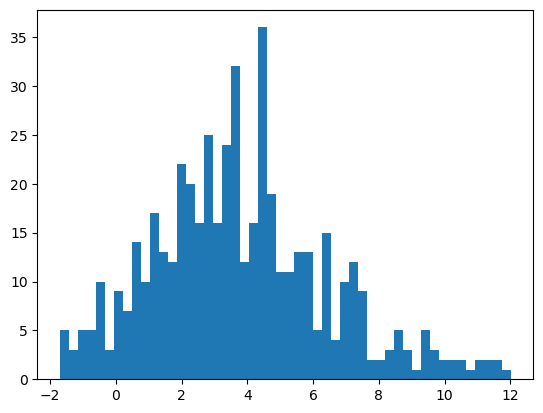

V12
NF


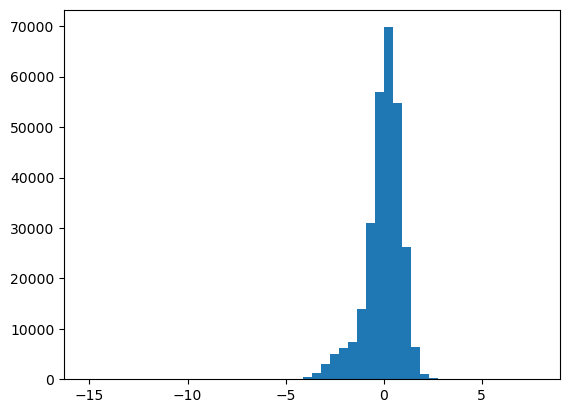

F


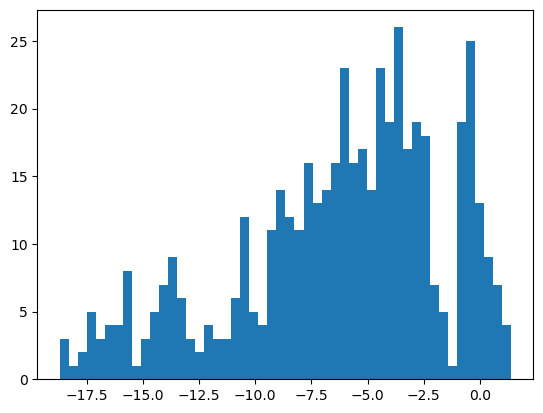

V13
NF


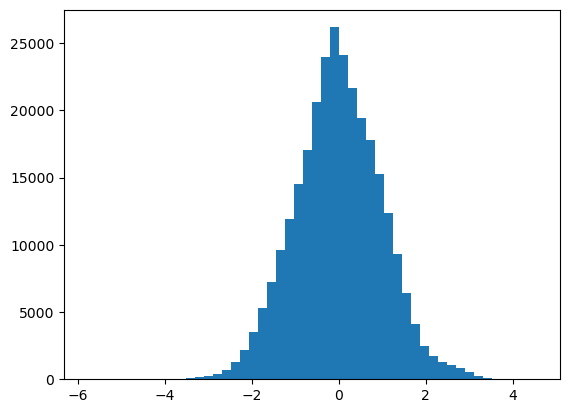

F


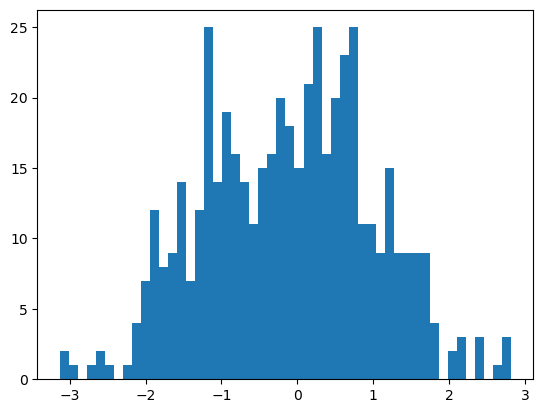

V14
NF


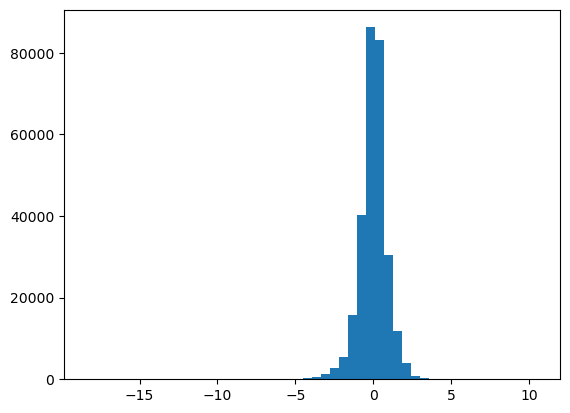

F


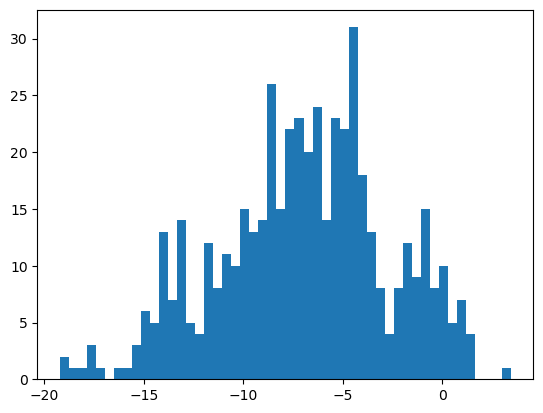

V15
NF


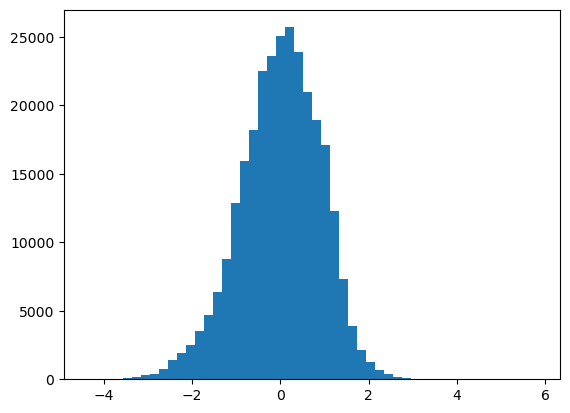

F


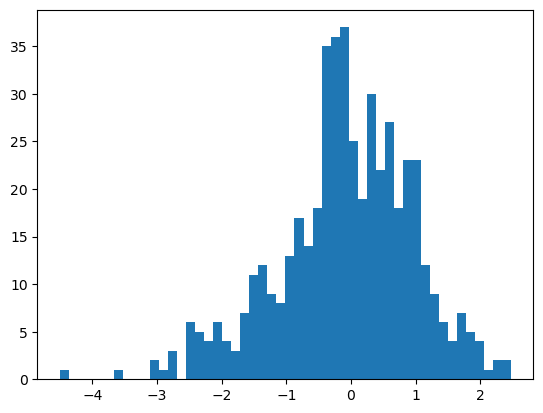

V16
NF


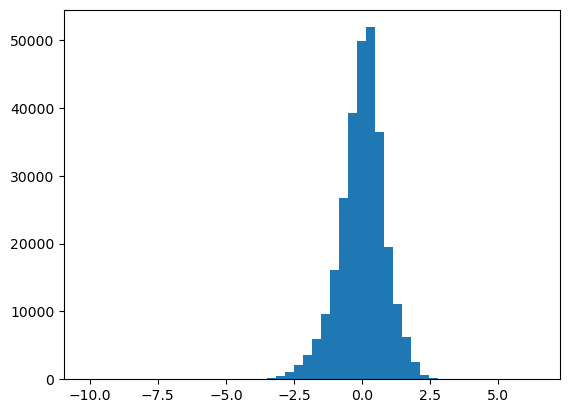

F


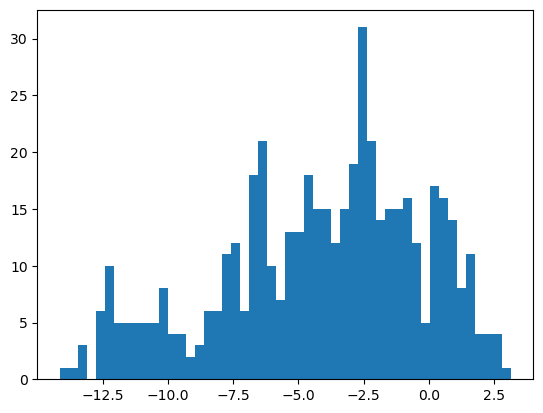

V17
NF


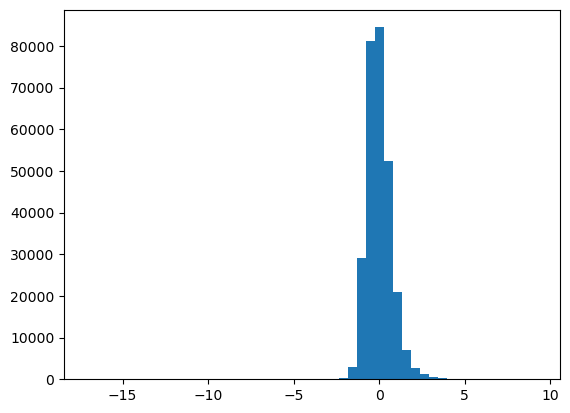

F


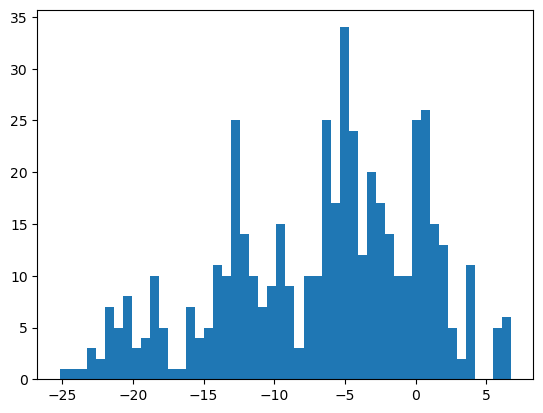

V18
NF


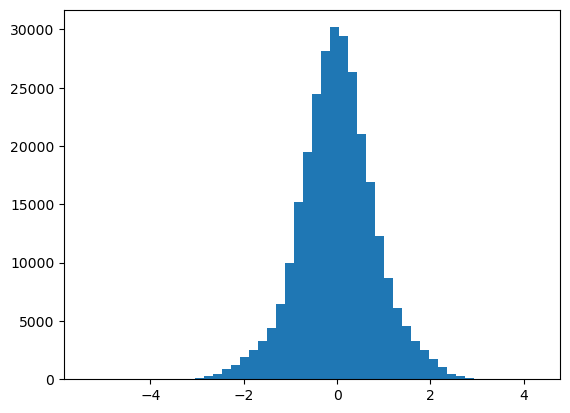

F


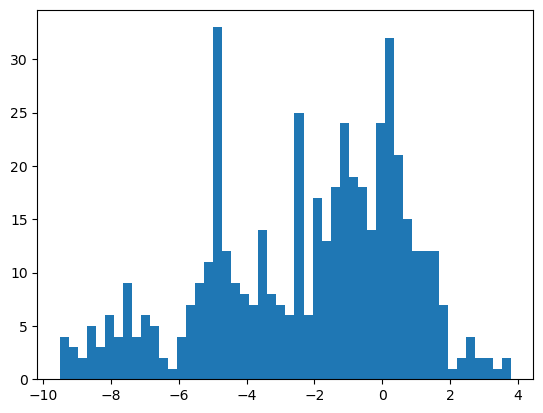

V19
NF


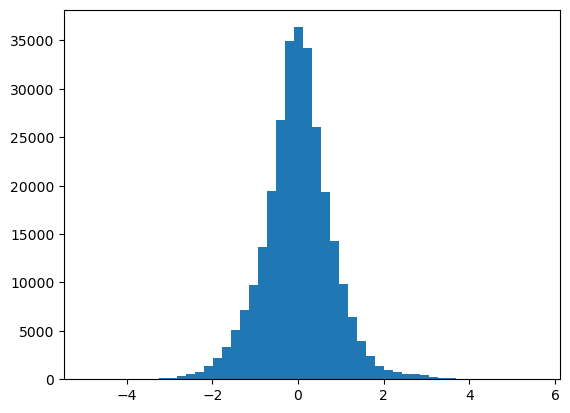

F


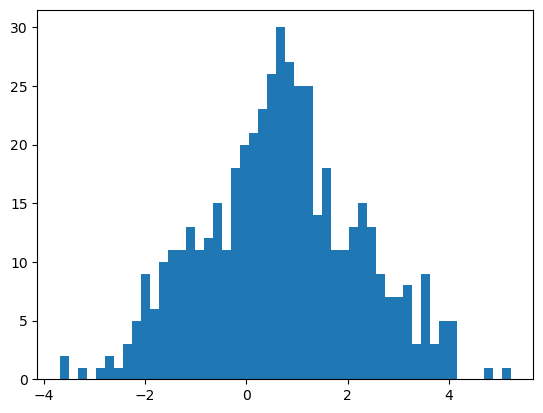

V20
NF


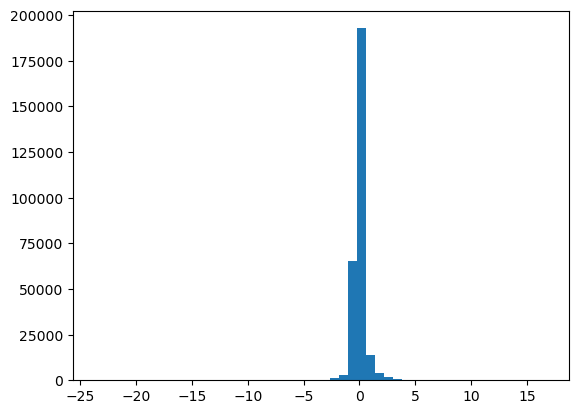

F


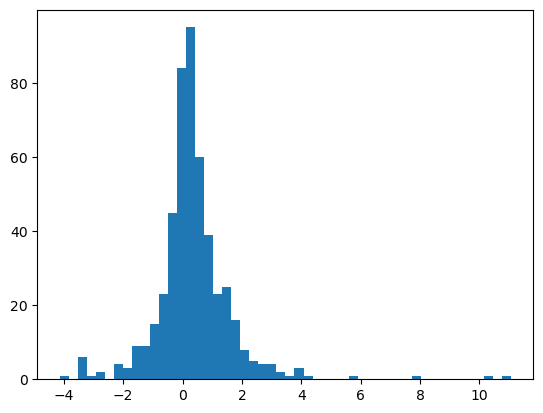

V21
NF


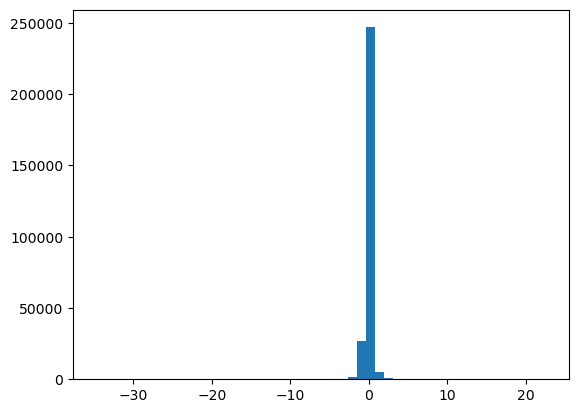

F


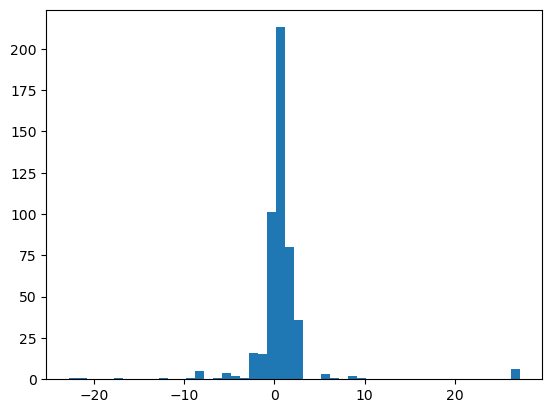

V22
NF


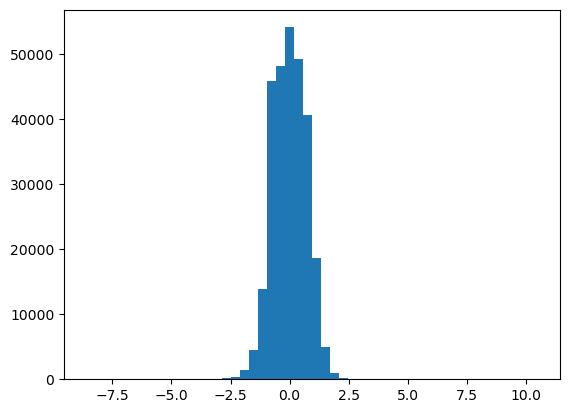

F


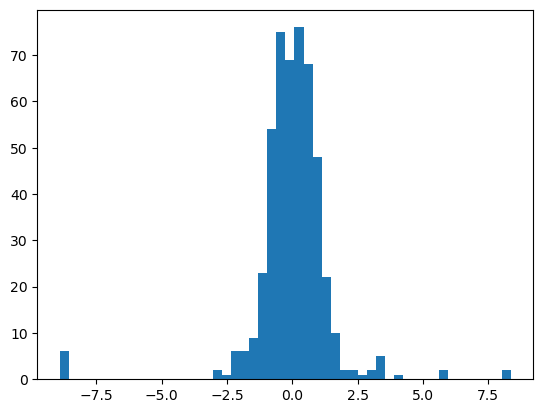

V23
NF


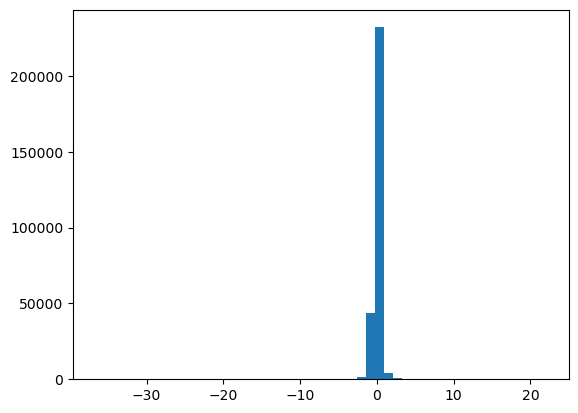

F


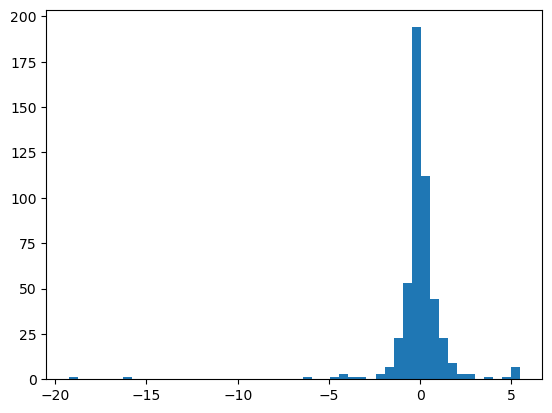

V24
NF


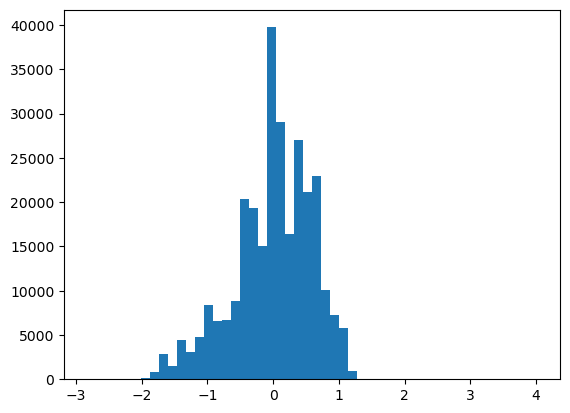

F


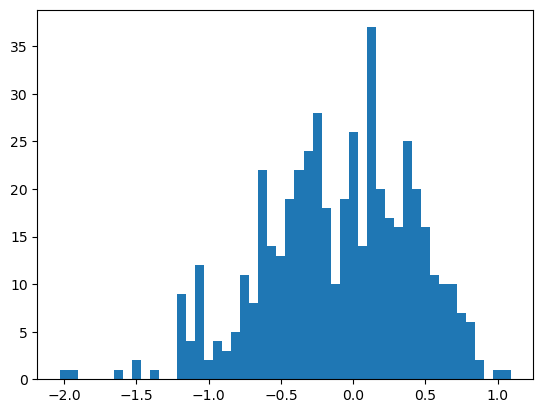

V25
NF


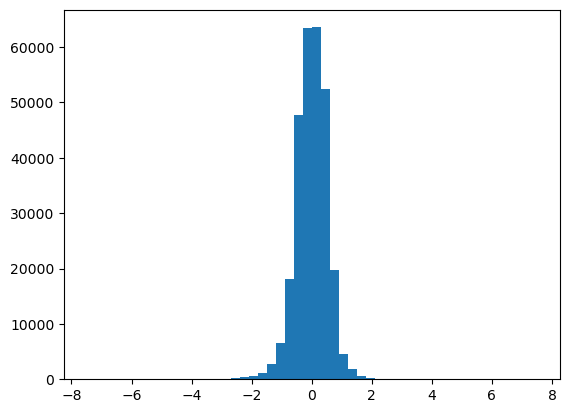

F


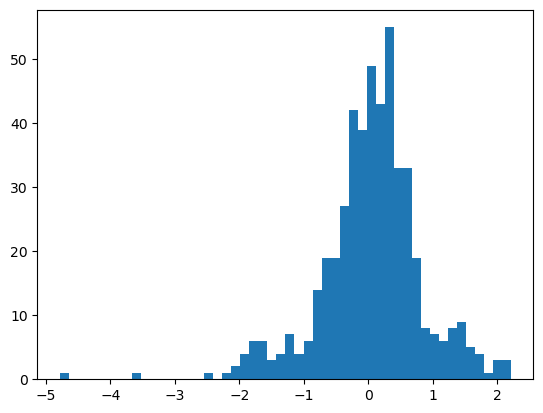

V26
NF


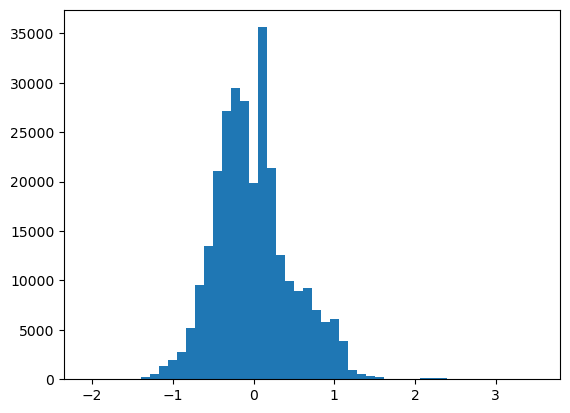

F


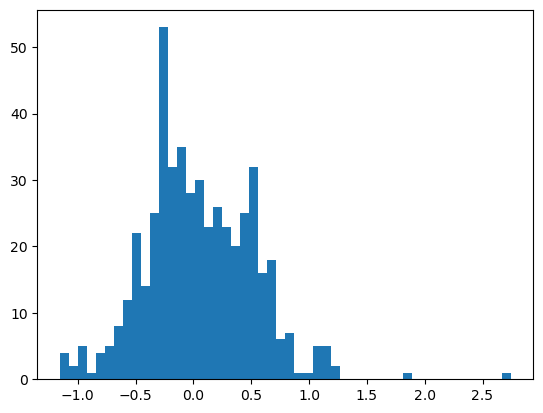

V27
NF


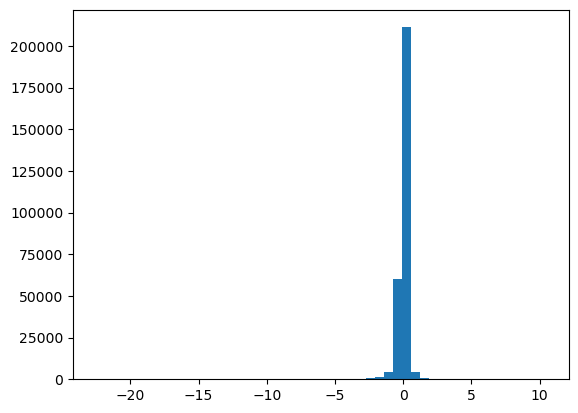

F


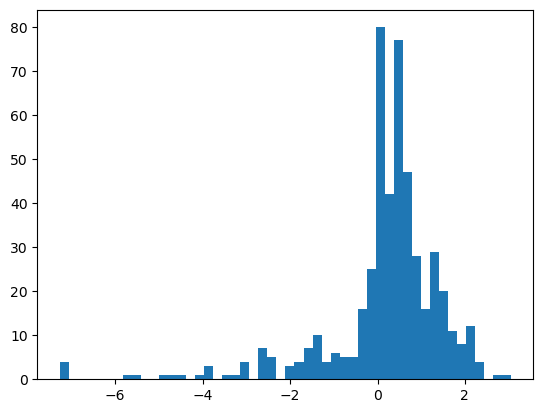

V28
NF


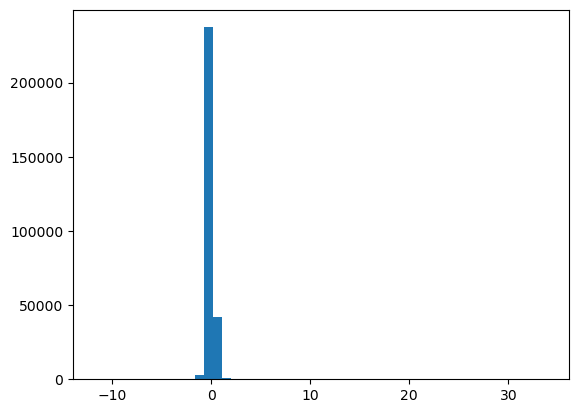

F


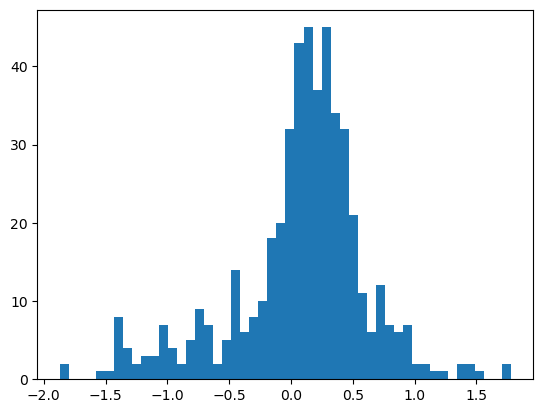

Amount
NF


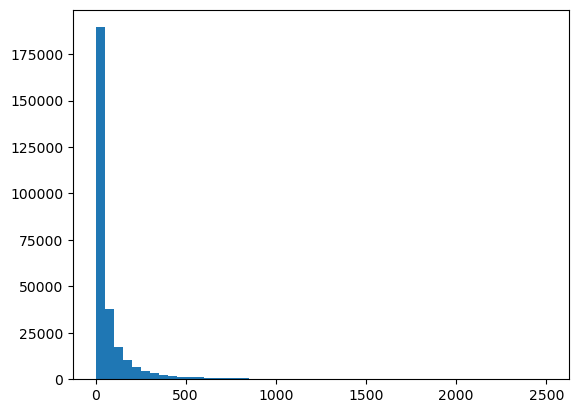

F


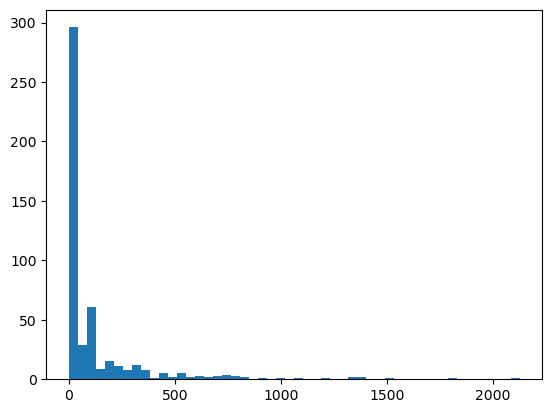

Class
NF


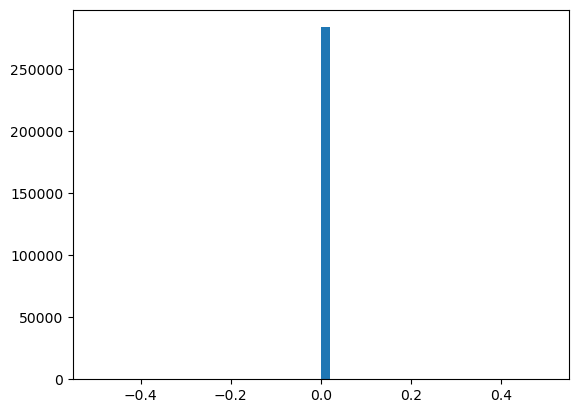

F


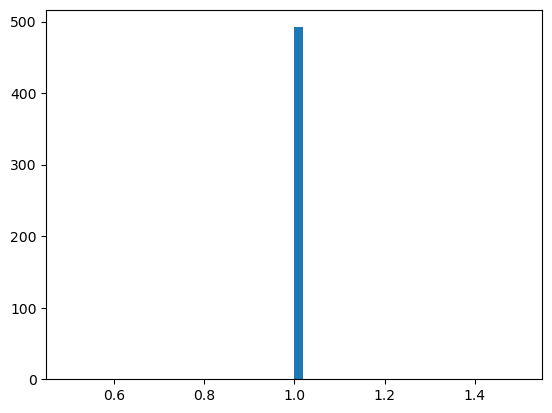

In [336]:
for x in col1:
    print(x)
    print('NF')
    plt.hist(grouped_amountlow_class0_df[x], bins=50)
    plt.show()
    print('F')
    plt.hist(grouped_amountlow_class1_df[x], bins=50)
    plt.show()

# Feature Selection

In [337]:
selected_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount',
       'Class']

In [338]:
X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount']

In [339]:
grouped_amountlow_df[selected_col].head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V27  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412  0.133558   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.008983   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980 -0.055353   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038  0.062723   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542  0.219422   

        V28  Amount  Class  
0 -0.021053  149.62      0  
1  0.014724    2.69      0  
2 -0.059752  378.66      0  
3  0.061458  123.50      0  
4  0.215153   69.99      0

In [340]:
fin_df = grouped_amountlow_df[selected_col]

In [341]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


In [342]:
for train_index, test_index in sss.split(fin_df, fin_df['Class']):
    train_df = fin_df.iloc[train_index]
    test_df = fin_df.iloc[test_index]

In [343]:
test_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
279302  168771.0 -0.281992  1.011931 -0.408814 -0.825358  0.682044 -0.530520   
264301  161362.0 -0.225476  0.764550  0.648221 -0.542046  0.638132 -0.490836   
134468   80820.0 -0.477686  0.890051  1.808870  1.090485  0.133485  0.324969   
112441   72651.0  1.174291  0.840324 -0.332783  2.177607  1.042412  0.604686   
236507  148840.0 -1.828510 -0.668474  2.186601  0.294606  1.382581 -0.875336   

              V7        V8        V9       V10       V11       V12       V13  \
279302  0.866664  0.029038  0.092548 -0.315425 -1.926793 -0.211730  0.098625   
264301  0.880524 -0.025886 -0.536511 -0.411142  0.349350  0.133277 -0.900746   
134468  0.609335  0.197063 -0.763489 -0.306206  1.336283  1.051715 -0.006893   
112441  0.243652  0.164960 -1.214870  0.311166  0.889900  0.426430  0.501651   
236507 -0.547554 -0.129180  0.526740 -0.170918 -0.416241 -0.070963 -0.303557   

             V14       V15       V16       V17       V18       V19       V20  \
279302  0.146604 -0.309919  0.249418 -0.723718 -0.387085  0.312402 -0.070497   
264301  0.574776 -0.671643 -0.006440 -0.494208  0.062541  0.974318 -0.097959   
134468  0.142308 -0.603397 -0.937182  0.360962 -0.336804  0.670774  0.030406   
112441 -0.668097  0.135190  1.267352 -0.112406  0.049003 -0.542704 -0.068010   
236507 -0.262518  1.313599 -0.471446 -0.057302 -0.125141  0.977400 -0.307984   

             V27       V28  Amount  Class  
279302 -0.169830 -0.208293   17.99      0  
264301  0.079983  0.136136    1.98      0  
134468  0.023296 -0.025378   22.92      0  
112441  0.007890  0.029807    8.19      0  
236507 -0.126398 -0.107233    5.00      0

In [344]:
train_df['Class'].describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [345]:
test_df['Class'].describe()

count    71092.000000
mean         0.001730
std          0.041559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

*Smote*

In [346]:
X_train_df = train_df[X_col]
y_train_df = train_df['Class']

In [347]:
X_test_df = test_df[X_col]
y_test_df = test_df['Class']

In [348]:
y_train_df.describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [349]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train_df)


In [350]:
X_train_smote.describe()

Time             V1             V2             V3  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean    88757.519283      -2.320227       1.807086      -3.409530   
std     47956.023413       5.074141       3.445123       5.766473   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     47586.192273      -3.035065      -0.118436      -4.995415   
50%     82411.000000      -0.853010       0.975910      -1.508359   
75%    135083.258714       0.821865       2.758054       0.273597   
max    172792.000000       2.454930      21.467203       9.382558   

                  V4             V5             V6             V7  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        2.262295      -1.558969      -0.691610      -2.773978   
std         3.045376       3.866783       1.664362       5.329426   
min        -5.683171     -23.669726     -26.160506     -41.506796   
25%        -0.069081      -1.838221      -1.502243      -3.261446   
50%         1.491527      -0.452434      -0.667578      -0.759170   
75%         4.273546       0.396792       0.057881       0.178528   
max        16.491217      34.801666      13.582056      19.553200   

                  V8             V9            V10            V11  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        0.293674      -1.278166      -2.778921       1.886704   
std         4.737078       2.123210       4.251324       2.660778   
min       -50.943369     -13.434066     -24.403185      -4.797473   
25%        -0.189014      -2.279630      -4.591252      -0.130842   
50%         0.177827      -0.789256      -0.981636       1.155895   
75%         0.879938       0.080948      -0.021559       3.500018   
max        19.587773      15.594995      23.745136      11.619723   

                 V12            V13            V14            V15  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -3.141822      -0.021385      -3.514407      -0.033295   
std         4.458640       0.974795       4.510081       0.922199   
min       -18.683715      -3.961758     -18.822087      -4.498945   
25%        -5.467455      -0.680671      -6.668354      -0.561802   
50%        -1.153414      -0.017092      -1.261192       0.010489   
75%         0.164968       0.626373       0.077402       0.608300   
max         4.846452       4.569009       7.754599       5.825654   

                 V16            V17            V18            V19  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -2.138039      -3.450672      -1.167192       0.385474   
std         3.339755       5.704743       2.254376       1.163782   
min       -13.563273     -25.162799      -9.335193      -4.676092   
25%        -3.674636      -5.599174      -1.899425      -0.343420   
50%        -0.772196      -0.655232      -0.439632       0.257720   
75%         0.197539       0.130083       0.266469       0.998208   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V27            V28         Amount  
count  425812.000000  425812.000000  425812.000000  425812.000000  
mean        0.176330       0.104420       0.059169      97.269312  
std         0.957168       0.875715       0.411291     189.303693  
min       -23.646890     -22.565679     -11.710896       0.000000  
25%        -0.192059      -0.067089      -0.053096       4.235378  
50%         0.043989       0.059326       0.038860      27.830000  
75%         0.439488       0.442492       0.224731      99.990000  
max        13.530721      10.507884      33.847808    2500.000000

In [351]:
y_train_smote.describe()

count    425812.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

After performing EDA, we found  certain feautures that are more important by observing some outliers which are fruad

# Logistic Regression

In [352]:


def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }
    
    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    
    # Define the scoring function
    scoring = make_scorer(f1_score)
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))
    
    # Perform the grid search with the training data
    grid_search.fit(X_train, y_train)
    
    # Return the best model
    return grid_search.best_estimator_

# Example usage:
# best_model = tune_logistic_regression(X_train, y_train)
# print("Best model parameters:", best_model.get_params())


In [353]:
from sklearn.model_selection import StratifiedKFold


In [354]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }

    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)

    # Define the scoring function
    scoring = make_scorer(f1_score)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))

    # Fit the model
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_

# Assuming X_train_smote and y_train_smote are defined
model1 = tune_logistic_regression(X_train_smote, y_train_smote)


In [355]:
def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }
    
    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    
    # Define the scoring function
    scoring = make_scorer(f1_score)
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))

In [356]:
model1= tune_logistic_regression(X_train_smote, y_train_smote)

In [357]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=10000)

In [358]:
print("X_train_smote shape: ", X_train_smote.shape)
print("y_train_smote shape: ", y_train_smote.shape)



X_train_smote shape:  (425812, 24)
y_train_smote shape:  (425812,)


In [359]:
log_reg = LogisticRegression(max_iter=10000)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],              
    'solver': ['liblinear']               
}
scoring = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_smote, y_train_smote)
print("Grid search completed.")
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

Grid search completed.
Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score:  0.9789855664788508
Best estimator:  LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')


In [360]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Define the model and parameters for grid search
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
scoring = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))

# Perform grid search
grid_search.fit(X_train_smote, y_train_smote)
print("Grid search completed.")
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)


Grid search completed.
Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score:  0.9789777325155269
Best estimator:  LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')


In [362]:
# Correctly assign the best estimator from the grid search
model1 = grid_search.best_estimator_

# Fit the model on the training data
model1.fit(X_train_smote, y_train_smote)


LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')

In [363]:
# Make predictions on the test data
predictions = model1.predict(X_test_df)

# Evaluate the model's performance
print(classification_report(y_test_df, predictions))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70969
           1       0.13      0.92      0.23       123

    accuracy                           0.99     71092
   macro avg       0.57      0.95      0.61     71092
weighted avg       1.00      0.99      0.99     71092



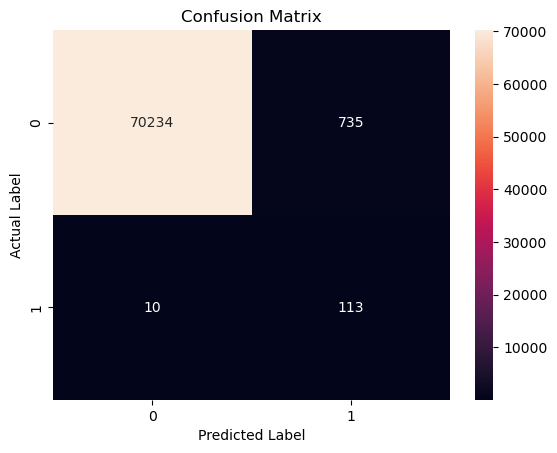

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70969
           1       0.13      0.92      0.23       123

    accuracy                           0.99     71092
   macro avg       0.57      0.95      0.61     71092
weighted avg       1.00      0.99      0.99     71092

AUROC Score: 0.9861861133230392


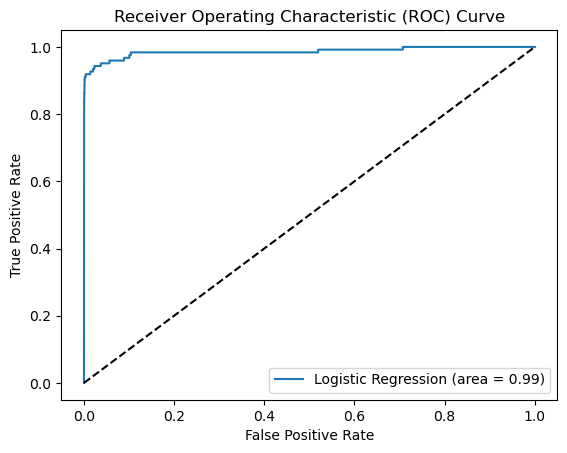

In [366]:

# Predictions
predictions = model1.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = model1.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#In logistic regression we have done hyper parameter tunning to get 98% accuracy in ROC curve 

# Decision Tree

In [367]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=30, random_state=0)

# Fit the model to the training data
clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(min_samples_leaf=30, random_state=0)

Here we have set a hyperparameterr of decision tree which is the minimum sample leaf =30 in order to avoid overfitting 

In [368]:
predictions1 = clf.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70969
           1       0.13      0.92      0.23       123

    accuracy                           0.99     71092
   macro avg       0.57      0.95      0.61     71092
weighted avg       1.00      0.99      0.99     71092



In decision tree we have selected the proper hyper parameters as minimum number of samples at leaf node =30 and we can observe 95% accuracy 

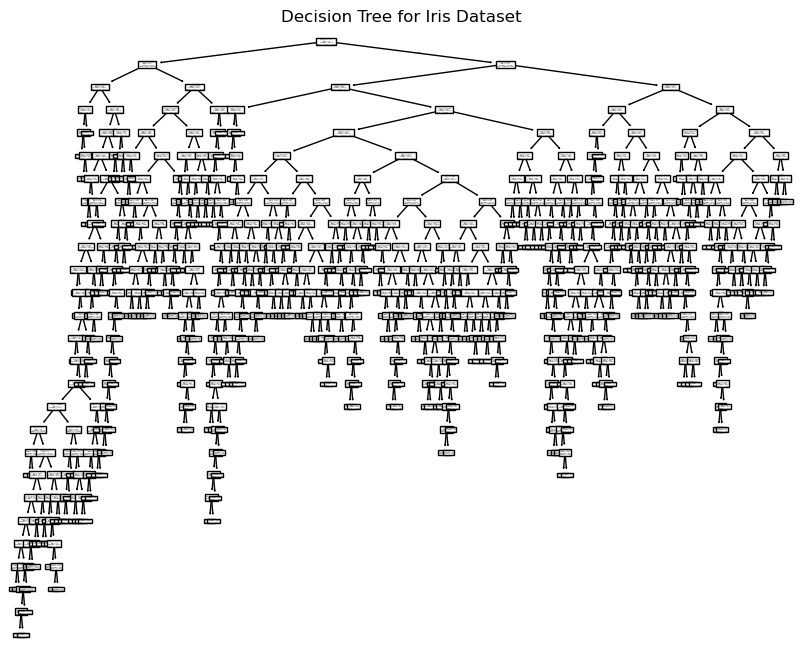

In [370]:

from sklearn.tree import DecisionTreeClassifier, plot_tree


# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf)
plt.title("Decision Tree for Iris Dataset")
plt.show()


# Random Forest

In [371]:
rf_clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=30,  # Set a finite max depth for each tree
    min_samples_leaf=30,  # Minimum number of samples required to be at a leaf node
    random_state=42
)
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=30, min_samples_leaf=30, random_state=42)

In [372]:
predictions = rf_clf.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.66      0.90      0.76       123

    accuracy                           1.00     71092
   macro avg       0.83      0.95      0.88     71092
weighted avg       1.00      1.00      1.00     71092



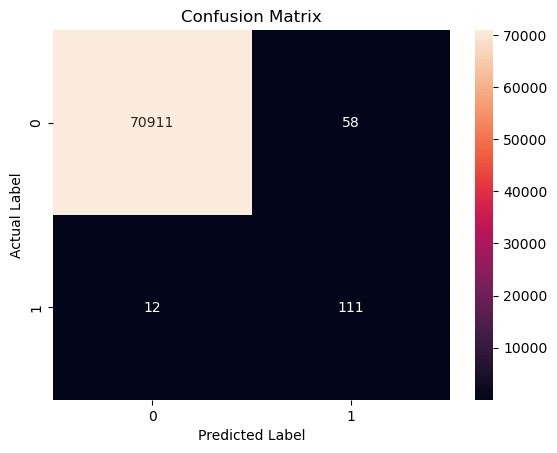

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.66      0.90      0.76       123

    accuracy                           1.00     71092
   macro avg       0.83      0.95      0.88     71092
weighted avg       1.00      1.00      1.00     71092

AUROC Score: 0.9906055397827999


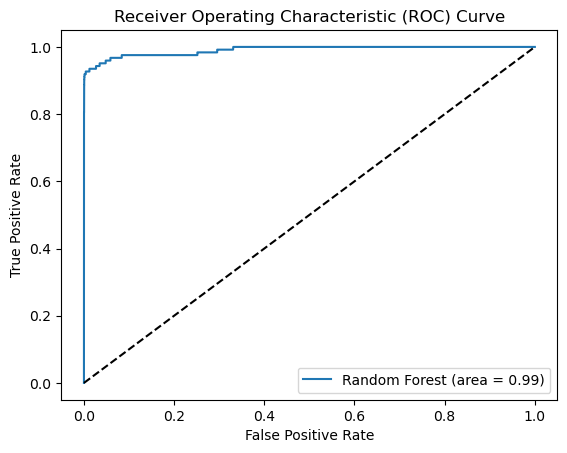

In [373]:
# Predictions
predictions = rf_clf.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = rf_clf.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In Random forest we have set proper hyper parameters as maximum depth = 30 and minimum sample at leaf =30 and we can observe accuracy rate is 99 % in ROC curve

#Conclusion

1.Random  Forest works as the best model for this data set.

2.We have got 99% accuracy in ROC curve  in Random Forest model. 

3.We can observe 98% accuracy in Logistic Regression which is better than previous result because the better outcome is caused by hyperparameter tunning in logistic Regression.

4.We also got  the accruacy rate of 95% in Decision Tree which is better indeed as hyperparameters setting being  administered ( Maximum depth =30 , Minimun number of samples at leaf node =30).

5.Frauds were not of high values in comparison to the normal transactions.

6.Maximum amount of fraud transaction was 2500-3000 in the native currency as per EDA.

7.There can be seen a rise in the Fraud transactions during the morning or early morning time period as it shows the  bimodal distribution.
